In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Choice of subject for preliminary analysis

In [2]:
#For this preliminary analysis I will only work with one subject (~2GB), from one of the following options:

#0: Healthy subject
healthy_folder = './healthy_subset/'
healthy_subj_num = 2
healthy_subj_subfolder = healthy_folder + str(healthy_subj_num).zfill(3) + '/'

#1: Diabetic subject but without CGM, same data collected as healthy subjects
D1_noCGM_subj_num = 12
D1_noCGM_subj_subfolder = healthy_folder + str(D1_noCGM_subj_num).zfill(3) + '_diabetes/'

#2: Diabetic subject with CGM
D1_CGM_folder = './diabetes_subset/'
D1_CGM_subj_num = 1 #4 #7 # 
D1_CGM_subj_subfolder = D1_CGM_folder + str(D1_CGM_subj_num).zfill(3) + '/'

subfolders_to_select = [healthy_subj_subfolder,D1_noCGM_subj_subfolder,D1_CGM_subj_subfolder]

#subj_selection = [1] #only D1 noCGM subject  
subj_selection = [2] #only D1 with CGM subject 
#subj_selection = [0] #only healthy subject 
#subj_selection = [0, 1, 2] #all 3 subjects 

for i in subj_selection:
    print(subfolders_to_select[i])

./diabetes_subset/001/


In [3]:
for i in subj_selection:
    subfolder_i = subfolders_to_select[i]
    if (subfolders_to_select[i].split('/')[-3]==D1_CGM_folder.split('/')[-2]): #only for D1 subjects with CGM
        #in this case the food does not have dates and times, which have to be inferred from the insulin file instead
        insulin_i_df = pd.read_csv(subfolder_i + 'insulin.csv',parse_dates=[['date','time']]).set_index('date_time') 
        food_i_df = pd.read_csv(subfolder_i + 'food.csv').drop(['picture','description'],axis=1)
    else:
        food_i_df = pd.read_csv(subfolder_i + 'food.csv',parse_dates=[['date','time']]).set_index('date_time').drop(['picture','description'],axis=1)
    
    glucose_i_df = pd.read_csv(subfolder_i + 'glucose.csv',parse_dates=[['date','time']]).set_index('date_time')
    
    # #sensor data is instead within subfolders like: './sensor_data/yyyy_mm_dd-hh_mm_ss' where the latter is the first timestamp recorded by the sensor

In [4]:
#Note that for D1 subjects the food dataframe does not contain the time and date 
food_i_df

,calories,balance,quality
0,357,Unbalance,Good quality
1,866,Unbalance,Good quality
2,190,Unbalance,Good quality
3,1063,Balance,Good quality
4,979,Unbalance,Good quality
5,42,Unbalance,Good quality
6,262,Unbalance,Low quality
7,130,Unbalance,Good quality
8,607,Unbalance,Medium quality
9,244,Unbalance,Low quality


In [5]:
#However, I can infer when the meals were consumed by looking at when the 'fast insulin' was consumed
#(whereas the slow insulin was consumed at nighttime)
insulin_i_df

,fast_insulin,slow_insulin,comment
date_time,,,
2014-10-01 10:06:00,7,NaN,NaN
2014-10-01 16:50:00,4,NaN,NaN
2014-10-01 19:28:00,6,NaN,NaN
2014-10-01 22:27:00,8,NaN,NaN
2014-10-01 23:48:00,0,31.0,NaN
2014-10-02 00:45:00,2,NaN,NaN
2014-10-02 10:10:00,3,NaN,NaN
2014-10-02 12:34:00,12,NaN,NaN
2014-10-02 21:24:00,5,NaN,NaN


In [6]:
#Note that for D1 (with CGM) subject 1 there was a typo in the glucose spreadsheet and all dates were shifted ahead by one day
#(I know that because insulin data and manual glucose measurements, which usually go together, were exactly one day apart)
from datetime import timedelta

if (subfolders_to_select[i].split('/')[-3]==D1_CGM_folder.split('/')[-2]) and (D1_CGM_subj_num ==1):
    glucose_i_df.index = glucose_i_df.index - timedelta(days=1)
    
glucose_i_df[glucose_i_df['type']=='manual']

,glucose,type,comments
date_time,,,
2014-09-30 19:23:00,9.4,manual,NaN
2014-10-01 00:15:00,10.2,manual,NaN
2014-10-01 10:06:00,9.2,manual,NaN
2014-10-01 16:50:00,9.4,manual,NaN
2014-10-01 19:28:00,11.0,manual,NaN
2014-10-01 22:27:00,15.0,manual,NaN
2014-10-02 00:45:00,14.1,manual,NaN
2014-10-02 10:10:00,4.0,manual,NaN
2014-10-02 12:34:00,8.8,manual,NaN


### Parse the food (for healthy) or fast insulin (for D1) information first, to extract the dates of data collection (which give the subfolder names for the sensor data) and the timestamps of the meals for alignment in time

#### Note: in future, it may useful to combine data across subjects by adding a for loop over i  (i= i-th subject)

In [7]:
if (subfolders_to_select[i].split('/')[-3]==D1_CGM_folder.split('/')[-2]): 
    #for D1 subjects with CGM, the meal info can be extracted from the fast insulin consumption, as this info
    #is not present in the food dataframe

    insulin_i_df
    
    #some timestamps may be out of order, so I resort:
    insulin_i_df=insulin_i_df.sort_index()
    
    allinsulin_i_times = insulin_i_df.index
    
    #I save the date as a 'foldername' since that's where the sensor data will be found
    insulin_i_df['sensor_folder']=insulin_i_df.index.strftime('%Y-%m-%d')
    
    #Identify and separate the dosages of slow-insulin, as those don't necessarily correspond to a meal
    #but to nighttime, whereas most of the main meals appear to be associated to fast-insulin consumption
    slow_insulin_bool = (~pd.isna(insulin_i_df['slow_insulin']) & (insulin_i_df['slow_insulin']!='0')  & (insulin_i_df['slow_insulin']!=0)) | ((insulin_i_df['fast_insulin']=='0') | (insulin_i_df['fast_insulin']==0))
    
    #This is probably not needed, since all the timestamps are already stored above in allinsulin_i_times
    #and I may never need to separately access the slow insulin consumption events
    slow_insulin_i_df = insulin_i_df[slow_insulin_bool]
    
    #What I really care are the times of fast-insulin consumption:
    fast_insulin_i_df = insulin_i_df[~slow_insulin_bool]
    
    #I assume these are the main meal times:
    meals_allinfo_i_df=fast_insulin_i_df
    
else:
    #for healthy or D1 subjects without CGM, the meal times are actually provided in the food dataframe
    #and there is no insulin dataframe
    
    food_i_df
    
    #some timestamps may be out of order, so I resort:
    food_i_df=food_i_df.sort_index()
    
    #I save the date as a 'foldername' since that's where the sensor data will be found
    food_i_df['sensor_folder']=food_i_df.index.strftime('%Y-%m-%d')
    
    allmeals_i_times = food_i_df.index
    
    #Identify and separate the meals (snacks, etc.) for which the full nutritional info was unavailable - 
    #these seem to mostly be snacks, whereas most of the main meals appear to have complete information 
    incomp_food_info_bool = pd.isna(food_i_df['calories']) | (pd.isna(food_i_df['quality']) | (food_i_df['calories']=='0')) 
    
    #This is probably not needed, since all the meal timestamps are already stored in allmeals_i_times and 
    #I may never need to separately access the meals with incomplete information
    meals_incomp_i_df = food_i_df[incomp_food_info_bool].index

    meals_allinfo_i_df = food_i_df[~incomp_food_info_bool]
    
meals_allinfo_i_df
    

,fast_insulin,slow_insulin,comment,sensor_folder
date_time,,,,
2014-10-01 10:06:00,7,NaN,NaN,2014-10-01
2014-10-01 16:50:00,4,NaN,NaN,2014-10-01
2014-10-01 19:28:00,6,NaN,NaN,2014-10-01
2014-10-01 22:27:00,8,NaN,NaN,2014-10-01
2014-10-02 00:45:00,2,NaN,NaN,2014-10-02
2014-10-02 10:10:00,3,NaN,NaN,2014-10-02
2014-10-02 12:34:00,12,NaN,NaN,2014-10-02
2014-10-02 21:24:00,5,NaN,NaN,2014-10-02
2014-10-03 06:11:00,9,NaN,NaN,2014-10-03


In [8]:
#No matter how I got here (from the insulin dataframe or the food dataframe), 
#I have a 'meals_allinfo_i_df' dataframe where one column gives the names of the sensor folders 
#and the indices (that are TimeIndex) give the estimate times of a meal 
meals_allinfo_i_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16 entries, 2014-10-01 10:06:00 to 2014-10-05 11:30:00
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fast_insulin   16 non-null     int64  
 1   slow_insulin   0 non-null      float64
 2   comment        0 non-null      float64
 3   sensor_folder  16 non-null     object 
dtypes: float64(2), int64(1), object(1)
memory usage: 640.0+ bytes


### Process the glucose information

In [9]:
glucose_i_df

,glucose,type,comments
date_time,,,
2014-09-30 19:14:00,10.3,cgm,NaN
2014-09-30 19:19:00,9.9,cgm,NaN
2014-09-30 19:23:00,9.4,manual,NaN
2014-09-30 19:24:00,9.8,cgm,NaN
2014-09-30 19:29:00,9.6,cgm,NaN
...,...,...,...
2014-10-05 16:34:02,12.3,cgm,NaN
2014-10-05 16:39:02,12.5,cgm,NaN
2014-10-05 16:44:02,12.5,cgm,NaN


In [10]:
#If I am dealing with D1 subjects with CGM, then I have a few manual measurements sprinkled in-between the CGM ones
#Because there are discrepancies due to the modality of measurement, I separate the manual measurements from the rest

if (subfolders_to_select[i].split('/')[-3]==D1_CGM_folder.split('/')[-2]): 
    #for D1 subjects with CGM
    
    manual_glucose_bool = (glucose_i_df['type']=='manual')
    
    manual_glucose_i_df = glucose_i_df[manual_glucose_bool]
    
    #Optional TBD: adjust the manual measurements to be between the CGM measurements collected just before and just after
    #the manual measurement, to avoid 'jumps' due to sensory modality when jointly using the manual and CGM measurements
    
    glucose_i_df = glucose_i_df[~manual_glucose_bool]
    
glucose_i_df

,glucose,type,comments
date_time,,,
2014-09-30 19:14:00,10.3,cgm,NaN
2014-09-30 19:19:00,9.9,cgm,NaN
2014-09-30 19:24:00,9.8,cgm,NaN
2014-09-30 19:29:00,9.6,cgm,NaN
2014-09-30 19:34:00,9.4,cgm,NaN
...,...,...,...
2014-10-05 16:34:02,12.3,cgm,NaN
2014-10-05 16:39:02,12.5,cgm,NaN
2014-10-05 16:44:02,12.5,cgm,NaN


In [11]:
#make sure the glucose measurements are sorted by date/time:
glucose_i_df=glucose_i_df.sort_index()

glucose_i_df['sensor_folder']=glucose_i_df.index.strftime('%Y-%m-%d')

glucose_i_df 

,glucose,type,comments,sensor_folder
date_time,,,,
2014-09-30 19:14:00,10.3,cgm,NaN,2014-09-30
2014-09-30 19:19:00,9.9,cgm,NaN,2014-09-30
2014-09-30 19:24:00,9.8,cgm,NaN,2014-09-30
2014-09-30 19:29:00,9.6,cgm,NaN,2014-09-30
2014-09-30 19:34:00,9.4,cgm,NaN,2014-09-30
...,...,...,...,...
2014-10-05 16:34:02,12.3,cgm,NaN,2014-10-05
2014-10-05 16:39:02,12.5,cgm,NaN,2014-10-05
2014-10-05 16:44:02,12.5,cgm,NaN,2014-10-05


In [12]:
#Round all time indices to the minute so we have regularly spaced measurements (this will be useful later)
glucose_i_df.index = glucose_i_df.index.round('min')

In [13]:
manual_glucose_bool.unique()

array([False,  True])

In [14]:
#check the frequency of CGM measurements for D1 subjects
if (subfolders_to_select[i].split('/')[-3]==D1_CGM_folder.split('/')[-2]): 
    #for D1 subjects with CGM

    CGM_Tvec = glucose_i_df.index[1:]-glucose_i_df.index[:-1]
    
    CGM_T_s = float(np.median(CGM_Tvec)/1e9)  
    
    CGM_datagaps = np.where(CGM_Tvec != np.median(CGM_Tvec))[0]
    
    CGM_glucose_f_Hz = 1/CGM_T_s
    print('CGM data frequency is {}Hz'.format(CGM_glucose_f_Hz))  
    
    if CGM_datagaps.size > 0:
        print('\n Some datagaps within the CGM data. \n')


CGM data frequency is 0.0033333333333333335Hz


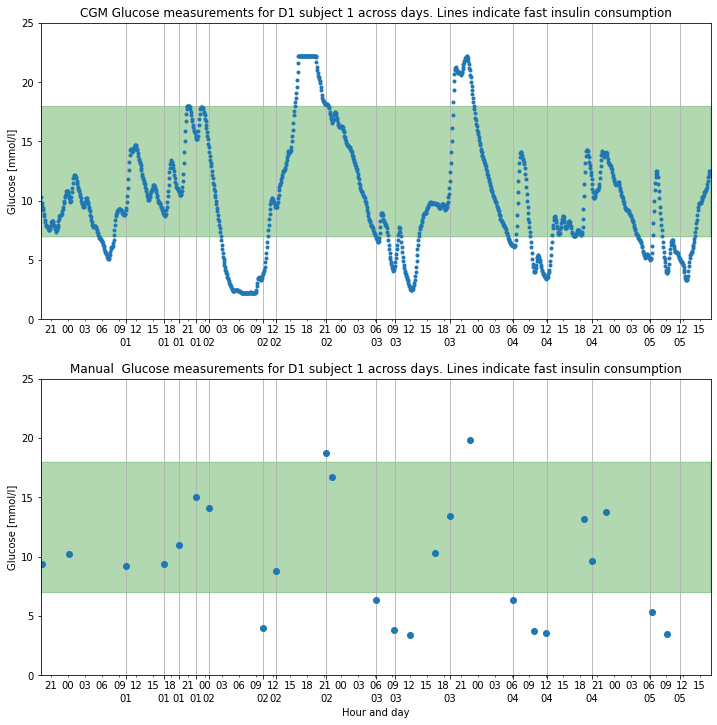

In [15]:
from matplotlib import dates, ticker

if (subfolders_to_select[i].split('/')[-3]==D1_CGM_folder.split('/')[-2]): 
    #for D1 subjects with CGM
    
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=[12,12])
    axes[0].set_title('CGM Glucose measurements for D1 subject {} across days. Lines indicate fast insulin consumption'.format(D1_CGM_subj_num),y=1.00)
    axes[0].plot(glucose_i_df['glucose'],marker='.',ls='none')
    axes[1].set_title('Manual  Glucose measurements for D1 subject {} across days. Lines indicate fast insulin consumption'.format(D1_CGM_subj_num),y=1.00)
    axes[1].plot(manual_glucose_i_df['glucose'],marker='o',ls='none')
    axes[1].set_xlabel('Hour and day')

    for k in range(0,2):
        axes[k].set_xlim([glucose_i_df.index[0],glucose_i_df.index[-1]])
        axes[k].set_ylim([0,25])
        axes[k].set_ylabel('Glucose [mmol/l]')
        axes[k].fill_between(x=glucose_i_df.index,y1=7,y2=18,alpha=0.3,color='green')
        axes[k].xaxis.set_minor_locator(dates.HourLocator(interval = 3))
        axes[k].xaxis.set_minor_formatter(dates.DateFormatter('%H')) 
        axes[k].xaxis.set_major_locator(ticker.FixedLocator(dates.date2num(fast_insulin_i_df.index))) #(insulin_i_df.index))) 
        axes[k].xaxis.set_major_formatter(dates.DateFormatter('\n%d')) #('\n%D, %H:%M')) 
        axes[k].xaxis.grid(True)

## Load the sensor data

In [16]:
exp_days_i = meals_allinfo_i_df['sensor_folder'].unique()
exp_days_i

array(['2014-10-01', '2014-10-02', '2014-10-03', '2014-10-04',
       '2014-10-05'], dtype=object)

Based on reading the Zephyr Bioharness documentation, the main physiological signals of interest here are:
HR (Heart Rate), BR (Breathing Rate), PeakAccel (max accel magnitude over the past 1s), Activity (mean accel magnitude over the past 1s). 
Other quantities related to EMGs and Breathing (pressure) sensor are still in beta version, and I would rather work with the
raw signals myself in later parts of the project.  

In [17]:
#this will be used later to fix anomalous sensory readings:

def set_anomalies_to_nan(x,x_lims):
    if (x<x_lims[0] or x>x_lims[1]):
        return np.nan
    else:
        return x
        
# I consider the following ranges for 'acceptable' sensor readings
#HR should be between 30 and 200
HR_lims = [30,200]
#BR should be between 3 and 70
BR_lims = [3,70]
#Acceleration (PeakAccel and Activity) should not exceed 3g
Acc_lims = [0,3]

In [18]:
#Here is the actual iteration of loading, preprocessing and storing the sensory data of interest

import os 

try:
    del Summary_i_df
except NameError:
    pass
    
#counter of number of segments of sensor data 
#(sensory data from different )

sensor_segments_count = -1

for j in range(0,len(exp_days_i)):
#debug version: 
#for j in range(0,1):     
    sensor_folder_i = subfolder_i + 'sensor_data/' 
    subfolders_i_all = os.listdir(sensor_folder_i)
    found_i_j_idx=[sub.find(exp_days_i[j].replace('-','_')) for sub in subfolders_i_all]
    try:
        sub_i_j_idx = found_i_j_idx.index(0)
        sensor_log_id_i_j = subfolders_i_all[sub_i_j_idx]
        sensor_subfolder_i_j = sensor_folder_i + sensor_log_id_i_j + '/'
        print('Loading sensor data from: ' + sensor_subfolder_i_j)
         
    except ValueError:
        print('Experiment day {} has no sensor data.'.format(exp_days_i[j]))
        break

    #Load Summary sensor data at low frequency including Heart Rate (HR), Breathing Rate (BR) and 
    #overall activity/movement (Avg and Max Acceleration)
    #Note that the sensor data was logged with day before month
    Summary_i_j_df = pd.read_csv(sensor_subfolder_i_j + sensor_log_id_i_j + '_Summary.csv',index_col='Time',parse_dates=True,dayfirst=True)

    Summary_i_j_df = Summary_i_j_df[['HR','BR','Activity','PeakAccel']]

    Summary_i_j_df['Exp. day'] = exp_days_i[j]
    Summary_i_j_df['Sensor segment'] = -1
    
    #If I am here, I did find some sensory data:
    sensor_segments_count += 1
    
    #However, there may still be gaps in timestamps (e.g. the sensor could have been turned on or off)
    #which I would need to consider as different segments (e.g. for filtering the data)
    
    Summary_Tvec = Summary_i_j_df.index[1:]-Summary_i_j_df.index[:-1]
    
    Summary_T_s = float(np.median(Summary_Tvec)/1e9)  
    
    Summary_datagaps = np.where(Summary_Tvec != np.median(Summary_Tvec))[0]
    
    Summary_i_j_endpoints = [Summary_i_j_df.index[0]]
    for gap_sample in Summary_datagaps:
        Summary_i_j_endpoints.append(Summary_i_j_df.index[gap_sample-1])
        Summary_i_j_endpoints.append(Summary_i_j_df.index[gap_sample])
    Summary_i_j_endpoints.append(Summary_i_j_df.index[-1])
    
    Summary_i_j_endpoints = np.sort(Summary_i_j_endpoints).reshape((-1,2))
    
    for k in range(0,Summary_i_j_endpoints.shape[0]):
        start_sam_k = Summary_i_j_endpoints[k][0]
        end_sam_k = Summary_i_j_endpoints[k][1]
        
        Summary_i_j_df['Sensor segment'].loc[start_sam_k:end_sam_k]= sensor_segments_count+k
         
        #Fix anomalous sensory readings (those values will be set to NaN):
        Summary_i_j_df['HR'].loc[start_sam_k:end_sam_k] = Summary_i_j_df['HR'].apply(lambda x:set_anomalies_to_nan(x,HR_lims)).loc[start_sam_k:end_sam_k]
        Summary_i_j_df['BR'].loc[start_sam_k:end_sam_k] = Summary_i_j_df['BR'].apply(lambda x:set_anomalies_to_nan(x,BR_lims)).loc[start_sam_k:end_sam_k]
        Summary_i_j_df['Activity'].loc[start_sam_k:end_sam_k] = Summary_i_j_df['Activity'].apply(lambda x:set_anomalies_to_nan(x,Acc_lims)).loc[start_sam_k:end_sam_k]
        Summary_i_j_df['PeakAccel'].loc[start_sam_k:end_sam_k] = Summary_i_j_df['PeakAccel'].apply(lambda x:set_anomalies_to_nan(x,Acc_lims)).loc[start_sam_k:end_sam_k]
        
        #I then fill the gaps within each segment (but not across segments) with linear interpolation
        Summary_i_j_df['HR'].loc[start_sam_k:end_sam_k] = Summary_i_j_df['HR'].interpolate(method='linear').loc[start_sam_k:end_sam_k]
        Summary_i_j_df['BR'].loc[start_sam_k:end_sam_k] = Summary_i_j_df['BR'].interpolate(method='linear').loc[start_sam_k:end_sam_k]
        Summary_i_j_df['Activity'].loc[start_sam_k:end_sam_k] = Summary_i_j_df['Activity'].interpolate(method='linear').loc[start_sam_k:end_sam_k]
        Summary_i_j_df['PeakAccel'].loc[start_sam_k:end_sam_k] = Summary_i_j_df['PeakAccel'].interpolate(method='linear').loc[start_sam_k:end_sam_k]
        
        #For convenience, and for comparison with the food/glucose/insulin data that only has minute-level timestamps, 
        #I round up the timeindices to the nearest second
        Summary_i_j_df = Summary_i_j_df.resample(rule='S').mean()
        
    try:
        Summary_i_df = pd.concat([Summary_i_df,Summary_i_j_df]) 
    except NameError: #if this is the first good day of experimental data
        Summary_i_df = Summary_i_j_df
           
    sensor_segments_count += (Summary_i_j_endpoints.shape[0]-1)
    

    

Loading sensor data from: ./diabetes_subset/001/sensor_data/2014_10_01-10_09_39/
Loading sensor data from: ./diabetes_subset/001/sensor_data/2014_10_02-10_56_44/
Loading sensor data from: ./diabetes_subset/001/sensor_data/2014_10_03-06_36_24/
Loading sensor data from: ./diabetes_subset/001/sensor_data/2014_10_04-06_34_57/
Experiment day 2014-10-05 has no sensor data.


In [19]:
#pd.set_option("display.max_rows", 20)

Summary_i_df

,HR,BR,Activity,PeakAccel,Sensor segment
Time,,,,,
2014-10-01 10:09:39,65.0,8.1,0.41,0.84,0
2014-10-01 10:09:40,65.0,8.1,0.51,1.03,0
2014-10-01 10:09:41,65.0,7.3,0.30,0.74,0
2014-10-01 10:09:42,65.0,7.3,0.43,0.98,0
2014-10-01 10:09:43,65.0,6.6,0.49,1.10,0
...,...,...,...,...,...
2014-10-04 13:47:56,62.0,18.4,0.07,0.10,3
2014-10-04 13:47:57,62.0,17.7,0.07,0.08,3
2014-10-04 13:47:58,62.0,17.7,0.05,0.08,3


In [20]:
Summary_T_s

1.0

In [21]:
#Sanity check on the datagaps: should be 1s everywhere except at the jumps between segments of data
#(e.g. across days)
Summary_Tvec = Summary_i_df.index[1:]-Summary_i_df.index[:-1]

Summary_Tvec.value_counts()


0 days 00:00:01    154482
0 days 11:14:59         1
0 days 12:33:19         1
0 days 08:55:21         1
Name: Time, dtype: int64

In [22]:
if (Summary_Tvec.value_counts().index[0].total_seconds() != Summary_T_s):
    print('\n Something inconsistent with the sensor data sampling period. \n')
else:
    #sampling period is confirmed to be 1s
    Summary_f_Hz = 1/Summary_T_s
    print('Sensor data frequency is {}Hz'.format(Summary_f_Hz))  

Sensor data frequency is 1.0Hz


In [23]:
##For convenience, and for comparison with the food/glucose/insulin data that only has minute-level timestamps,
##I could resample to the next second
##However, doing the following would create 1s indices bridging the segments of missing data, and fill with NaN
##I think at the moment this is not needed and would unnecessarily make the dataframe heavy to handle
#Summary_i_df = Summary_i_df.resample(rule='S').mean()


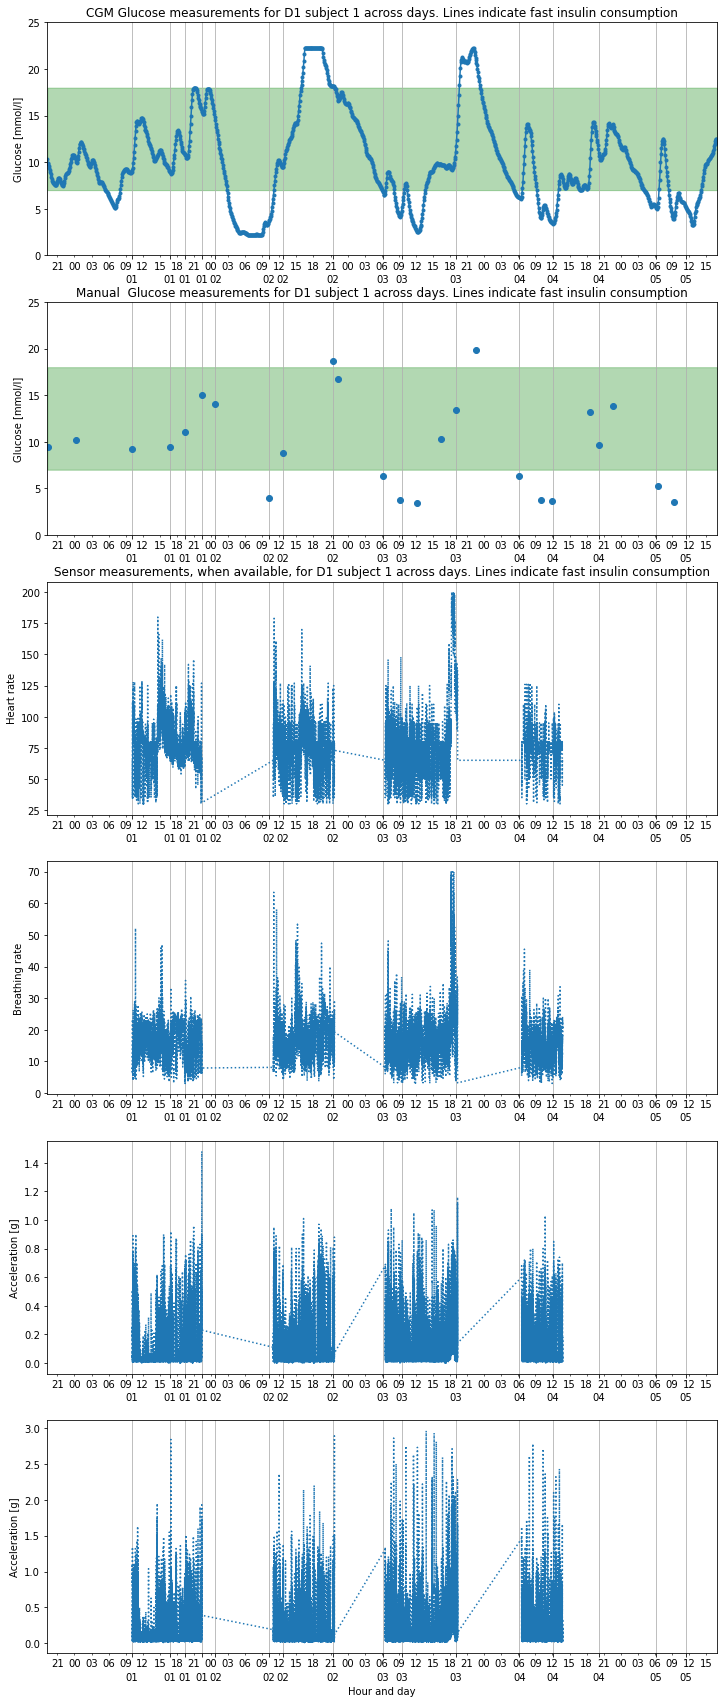

In [24]:
#Now repeat the plot of glucose as above, but add the evolution of sensor data (when available) throughout the experiment

if (subfolders_to_select[i].split('/')[-3]==D1_CGM_folder.split('/')[-2]): 
    #for D1 subjects with CGM
    
    fig, axes = plt.subplots(nrows=6, ncols=1, figsize=[12,30])
    axes[0].set_title('CGM Glucose measurements for D1 subject {} across days. Lines indicate fast insulin consumption'.format(D1_CGM_subj_num),y=1.00)
    axes[0].plot(glucose_i_df['glucose'],marker='.')
    axes[1].set_title('Manual  Glucose measurements for D1 subject {} across days. Lines indicate fast insulin consumption'.format(D1_CGM_subj_num),y=1.00)
    axes[1].plot(manual_glucose_i_df['glucose'],marker='o',ls='none')
    axes[2].set_title('Sensor measurements, when available, for D1 subject {} across days. Lines indicate fast insulin consumption'.format(D1_CGM_subj_num),y=1.00)
    #axes[2].set_title('Heart rate for D1 subject {} across days. Lines indicate fast insulin consumption'.format(D1_CGM_subj_num),y=1.00)
    axes[2].plot(Summary_i_df['HR'],ls=':') #,marker='.')
    axes[2].set_ylabel('Heart rate')
    #axes[3].set_title('Breathing rate for D1 subject {} across days. Lines indicate fast insulin consumption'.format(D1_CGM_subj_num),y=1.00)
    axes[3].plot(Summary_i_df['BR'],ls=':') #,marker='.')
    axes[3].set_ylabel('Breathing rate')
    #axes[4].set_title('Activity (mean accel) for D1 subject {} across days. Lines indicate fast insulin consumption'.format(D1_CGM_subj_num),y=1.00)
    axes[4].plot(Summary_i_df['Activity'],ls=':') #,marker='.')
    axes[4].set_ylabel('Acceleration [g]')
    #axes[5].set_title('Peak Accel. for D1 subject {} across days. Lines indicate fast insulin consumption'.format(D1_CGM_subj_num),y=1.00)
    axes[5].plot(Summary_i_df['PeakAccel'],ls=':') #,marker='.')
    axes[5].set_ylabel('Acceleration [g]')
    axes[-1].set_xlabel('Hour and day')

    for k in range(0,len(axes)):
        axes[k].set_xlim([glucose_i_df.index[0],glucose_i_df.index[-1]])
        axes[k].xaxis.set_minor_locator(dates.HourLocator(interval = 3))
        axes[k].xaxis.set_minor_formatter(dates.DateFormatter('%H')) 
        axes[k].xaxis.set_major_locator(ticker.FixedLocator(dates.date2num(fast_insulin_i_df.index))) #(insulin_i_df.index))) 
        axes[k].xaxis.set_major_formatter(dates.DateFormatter('\n%d')) #('\n%D, %H:%M')) 
        axes[k].xaxis.grid(True)
        
    for k in range(0,2):    
        axes[k].set_ylim([0,25])
        axes[k].set_ylabel('Glucose [mmol/l]')
        axes[k].fill_between(x=glucose_i_df.index,y1=7,y2=18,alpha=0.3,color='green')

### Import raw higher-frequency breathing sensor data

Change the following cells to 'Code' when interested in this (not used for preliminary analysis)

#### Optionally, downsample all breathing data sensor data to 1Hz for comparison with the other Summary sensor data (HR, BR, etc.) 

### TBD: import raw high-frequency ECG and Acceleration sensor data

In [25]:
#ECG_i_j_df = pd.read_csv(sensor_subfolder_j + sensor_log_id_j + '_ECG.csv',index_col='Time',parse_dates=True,dayfirst=True) 
#Accel_i_j_df = pd.read_csv(sensor_subfolder_j + sensor_log_id_j + '_Accel.csv',index_col='Time',parse_dates=True,dayfirst=True)    

## Preprocess the sensor data of interest (HR, BR, Activity, etc.) over a segment of data

In [26]:
#pd.set_option("display.max_rows", 50)

Summary_i_df['Sensor segment'].unique()


array([0, 1, 2, 3], dtype=int64)

In [27]:
segment_to_show = 0

Summary_i_df_seg = Summary_i_df[Summary_i_df['Sensor segment']==segment_to_show]
Summary_i_df_seg

,HR,BR,Activity,PeakAccel,Sensor segment
Time,,,,,
2014-10-01 10:09:39,65.0,8.1,0.41,0.84,0
2014-10-01 10:09:40,65.0,8.1,0.51,1.03,0
2014-10-01 10:09:41,65.0,7.3,0.30,0.74,0
2014-10-01 10:09:42,65.0,7.3,0.43,0.98,0
2014-10-01 10:09:43,65.0,6.6,0.49,1.10,0
...,...,...,...,...,...
2014-10-01 22:23:21,31.0,7.6,0.25,0.46,0
2014-10-01 22:23:22,31.0,7.6,0.65,1.12,0
2014-10-01 22:23:23,31.0,7.8,0.56,0.92,0


In [28]:
#I also need to set the frequency of the timeindices in order to apply filtering techniques (FIR, IIR, etc.) later on
Summary_i_df_seg.index.freq = Summary_i_df_seg.index.inferred_freq

In [29]:
Summary_i_df_seg.index

DatetimeIndex(['2014-10-01 10:09:39', '2014-10-01 10:09:40',
               '2014-10-01 10:09:41', '2014-10-01 10:09:42',
               '2014-10-01 10:09:43', '2014-10-01 10:09:44',
               '2014-10-01 10:09:45', '2014-10-01 10:09:46',
               '2014-10-01 10:09:47', '2014-10-01 10:09:48',
               ...
               '2014-10-01 22:23:16', '2014-10-01 22:23:17',
               '2014-10-01 22:23:18', '2014-10-01 22:23:19',
               '2014-10-01 22:23:20', '2014-10-01 22:23:21',
               '2014-10-01 22:23:22', '2014-10-01 22:23:23',
               '2014-10-01 22:23:24', '2014-10-01 22:23:25'],
              dtype='datetime64[ns]', name='Time', length=44027, freq='S')

In [30]:
Summary_i_df_seg.index[-1]

Timestamp('2014-10-01 22:23:25', freq='S')

In [31]:
#Note: here I use the dataframe 'meals_allinfo_i_df' and not 'fast_insulin_i_df' as the following plots can
#be useful also for healthy subjects - that have a well-defined 'meals_allinfo_i_df' but not 'fast_insulin_i_df'
#For D1 subjects with CGM, 'meals_allinfo_i_df' and 'fast_insulin_i_df' are identical

meals_allinfo_i_df_seg = meals_allinfo_i_df[(meals_allinfo_i_df.index >= Summary_i_df_seg.index[0]) & (meals_allinfo_i_df.index <= Summary_i_df_seg.index[-1])]

meals_allinfo_i_df_seg

,fast_insulin,slow_insulin,comment,sensor_folder
date_time,,,,
2014-10-01 16:50:00,4,NaN,NaN,2014-10-01
2014-10-01 19:28:00,6,NaN,NaN,2014-10-01


In [32]:
#Glucose data just for the segment under consideration
glucose_i_df_seg = glucose_i_df[(glucose_i_df.index >= Summary_i_df_seg.index[0]) & (glucose_i_df.index <= Summary_i_df_seg.index[-1])]
glucose_i_df_seg

,glucose,type,comments,sensor_folder
date_time,,,,
2014-10-01 10:14:00,9.4,cgm,NaN,2014-10-01
2014-10-01 10:19:00,9.9,cgm,NaN,2014-10-01
2014-10-01 10:24:00,10.4,cgm,NaN,2014-10-01
2014-10-01 10:29:00,11.1,cgm,NaN,2014-10-01
2014-10-01 10:34:00,11.8,cgm,NaN,2014-10-01
...,...,...,...,...
2014-10-01 21:59:00,16.2,cgm,NaN,2014-10-01
2014-10-01 22:04:00,16.0,cgm,NaN,2014-10-01
2014-10-01 22:09:00,15.9,cgm,NaN,2014-10-01


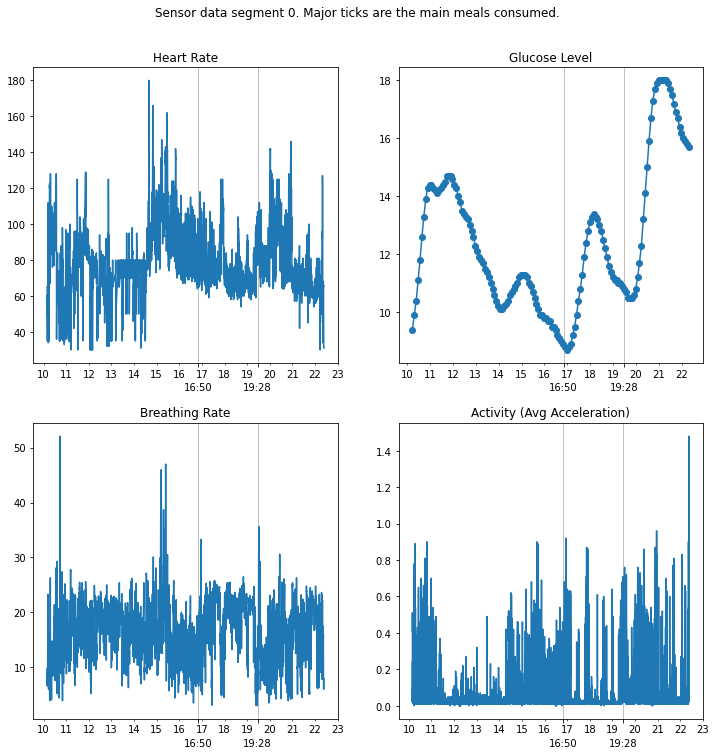

In [33]:
import matplotlib.ticker as ticker

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=[12,12])
fig.suptitle('Sensor data segment {seg}. Major ticks are the main meals consumed.'.format(seg=segment_to_show),y=0.95)

axes[0,0].plot(Summary_i_df_seg['HR'])
axes[0,0].set_title('Heart Rate')

axes[0,1].plot(glucose_i_df_seg['glucose'],marker='o')
axes[0,1].set_title('Glucose Level')

axes[1,0].plot(Summary_i_df_seg['BR'])
axes[1,0].set_title('Breathing Rate')

axes[1,1].plot(Summary_i_df_seg['Activity'])
axes[1,1].set_title('Activity (Avg Acceleration)')

for k,l in np.ndindex((2,2)):
    #axes[k,l].set_xlim([glucose_i_df_seg.index[0],glucose_i_df_seg.index[-1]])
    axes[k,l].xaxis.set_minor_locator(dates.HourLocator())
    axes[k,l].xaxis.set_minor_formatter(dates.DateFormatter('%H')) 
    axes[k,l].xaxis.set_major_locator(ticker.FixedLocator(dates.date2num(meals_allinfo_i_df_seg.index))) 
    axes[k,l].xaxis.set_major_formatter(dates.DateFormatter('\n%H:%M')) 
    axes[k,l].xaxis.grid(True)

# #Old version with also Breathing raw signal (downsampled to 1Hz) and peak acceleration

#fig, axes = plt.subplots(nrows=3, ncols=2, figsize=[10,15])
#fig.suptitle('Sensor data segment {seg}. Major ticks are the main meals consumed.'.format(seg=segment_to_show),y=0.95)

#axes[0,0].plot(Summary_i_df_seg['HR'])
#axes[0,0].set_title('Heart Rate')

#axes[0,1].plot(glucose_i_df_seg['glucose'],marker='o')
#axes[0,1].set_title('Glucose Level')

#axes[1,0].plot(Summary_i_df_seg['BR'])
#axes[1,0].set_title('Breathing Rate')

#axes[1,1].plot(Breathing_i_df_1Hz['BreathingWaveform'])
#axes[1,1].set_title('Breathing Waveform')

#axes[2,0].plot(Summary_i_df_seg['Activity'])
#axes[2,0].set_title('Activity (Avg Acceleration)')

#axes[2,1].plot(Summary_i_df_seg['PeakAccel'])
#axes[2,1].set_title('Peak Acceleration')

#for k,l in np.ndindex((3,2)):
#    axes[k,l].xaxis.set_minor_locator(dates.HourLocator())
#    axes[k,l].xaxis.set_minor_formatter(dates.DateFormatter('%H')) 
#    axes[k,l].xaxis.set_major_locator(ticker.FixedLocator(dates.date2num(meals_allinfo_i_df_seg.index))) 
#    axes[k,l].xaxis.set_major_formatter(dates.DateFormatter('\n%H:%M')) 
#    axes[k,l].xaxis.grid(True)


### Smooth the sensory data 
#### Let's assess different techniques and levels of smoothing on the sensory data, starting with simple rolling windows

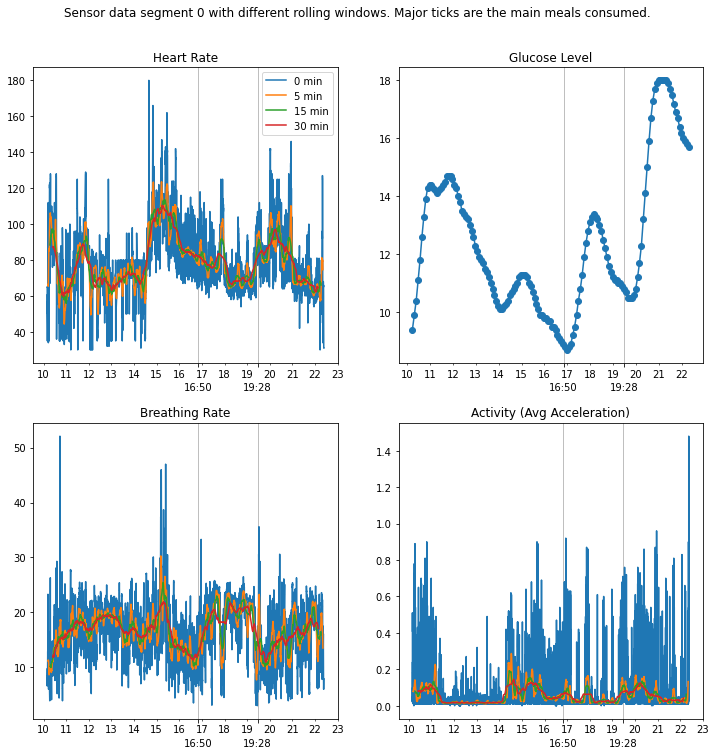

In [34]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=[12,12])
fig.suptitle('Sensor data segment {seg} with different rolling windows. Major ticks are the main meals consumed.'.format(seg=segment_to_show),y=0.95)

axes[0,0].plot(Summary_i_df_seg['HR'])
axes[0,0].set_title('Heart Rate')

axes[0,1].plot(glucose_i_df_seg['glucose'],marker='o')
axes[0,1].set_title('Glucose Level')

axes[1,0].plot(Summary_i_df_seg['BR'])
axes[1,0].set_title('Breathing Rate')

axes[1,1].plot(Summary_i_df_seg['Activity'])
axes[1,1].set_title('Activity (Avg Acceleration)')

for k,l in np.ndindex((2,2)):
    axes[k,l].xaxis.set_minor_locator(dates.HourLocator())
    axes[k,l].xaxis.set_minor_formatter(dates.DateFormatter('%H')) 
    axes[k,l].xaxis.set_major_locator(ticker.FixedLocator(dates.date2num(meals_allinfo_i_df_seg.index))) 
    axes[k,l].xaxis.set_major_formatter(dates.DateFormatter('\n%H:%M')) 
    axes[k,l].xaxis.grid(True)
    
#rolling windows to try
rolling_windows_min_labels = ['0 min','5 min','15 min','30 min'] #['0','1',5','10',15','30']
rolling_windows_s = [60*int(min_label.split()[0]) for min_label in rolling_windows_min_labels[1:]] 

for rolling_win_s in rolling_windows_s:
    #I will compensate for the phase lag introduced by the rolling mean filter, which is in seconds (and hence number of samples)
    phase_lag_s = int(rolling_win_s/2)
    
    axes[0,0].plot(Summary_i_df_seg['HR'].rolling(window=rolling_win_s).mean().shift(-phase_lag_s))
    axes[1,0].plot(Summary_i_df_seg['BR'].rolling(window=rolling_win_s).mean().shift(-phase_lag_s))
    axes[1,1].plot(Summary_i_df_seg['Activity'].rolling(window=rolling_win_s).mean().shift(-phase_lag_s))
    
    axes[0,0].legend(rolling_windows_min_labels)
    

#### If this is a D1 subject, and I will later attempt to regress other variables against CGM glucose measurements, I can also try to filter the sensor data very aggressively to match the smoothness of the CGM measurements (that have much lower sampling frequency than the other sensors)

In [35]:
CGM_glucose_f_Hz

0.0033333333333333335

In [36]:
import scipy
from scipy import signal

#FIR low-pass filters

numtaps_FIR = (60*40)+1 #use 40mins of data to make the filter sharp enough 
#must be odd - the larger the value, the sharper the cutoff but we lose more edge values at the beginning and the end

#The signal will also be delayed by (numtaps-1)/2 samples, but that could be perfectly corrected by shifting back the output 
#(of course only for postprocessing, not for real-time operation) since FIR filters are linear phase
fir_delay = int((numtaps_FIR-1)/2)

#I try a couple of values of cutoff frequency, up to the max value of frequency content in the glucose measurement signal,
#which is half the CGM sampling frequency:
max_cutoff = CGM_glucose_f_Hz/2

FIR_cutoff_fractions = np.array([1/100, 1/10, 1]) #np.array([1/10, 1/3, 1])
cutoffs_to_try = max_cutoff*FIR_cutoff_fractions

CGMlike_lowpass_FIRs = np.empty([len(cutoffs_to_try),numtaps_FIR])

for k,cutoff in enumerate(cutoffs_to_try):

    CGMlike_lowpass_FIRs[k] = signal.firwin(numtaps_FIR, cutoff, fs=Summary_f_Hz, pass_zero = True) #,width=None, window='hamming', pass_zero=True, scale=True, nyq=None)
    
    
#IIR low-pass filters (Butterworth)

IIR_cutoff_fractions = np.array([1/10, 1/4, 1/2])
cutoffs_to_try = max_cutoff*IIR_cutoff_fractions

order_IIR = 5

#new version with second-order-sections implementation (more robust):

CGMlike_lowpass_IIRs_sos = np.empty([len(cutoffs_to_try),int((order_IIR+1)/2),6])
CGMlike_lowpass_IIRs_zi = np.empty([len(cutoffs_to_try),int((order_IIR+1)/2),2])

for k,cutoff in enumerate(cutoffs_to_try):

    CGMlike_lowpass_IIRs_sos[k] = signal.butter(order_IIR, cutoff, fs=Summary_f_Hz, output='sos')
    #set initial conditions as well
    CGMlike_lowpass_IIRs_zi[k] = signal.sosfilt_zi(CGMlike_lowpass_IIRs_sos[k])


# #old version using transfer function - possibly unstable for orders>=4
#
#CGMlike_lowpass_IIRs_num = np.empty([len(cutoffs_to_try),order_IIR+1])
#CGMlike_lowpass_IIRs_den = np.empty([len(cutoffs_to_try),order_IIR+1])
#CGMlike_lowpass_IIRs_zi = np.empty([len(cutoffs_to_try),order_IIR]) #len(zi)=max(len(num),len(den))
#
#for k,cutoff in enumerate(cutoffs_to_try):
#
#    CGMlike_lowpass_IIRs_num[k], CGMlike_lowpass_IIRs_den[k] = signal.butter(order_IIR, cutoff, fs=Summary_f_Hz)
#    #set initial conditions as well
#    CGMlike_lowpass_IIRs_zi[k] = signal.lfilter_zi(CGMlike_lowpass_IIRs_num[k], CGMlike_lowpass_IIRs_den[k])

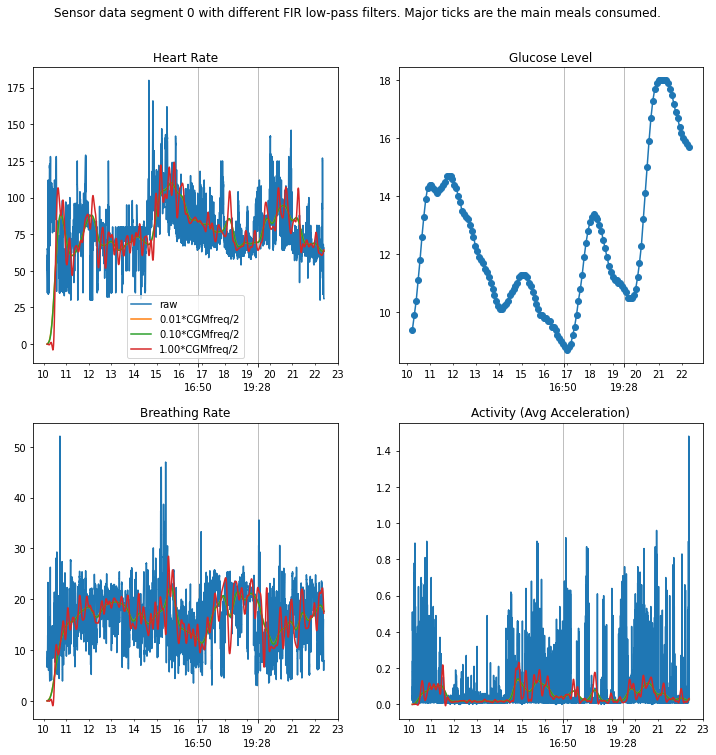

In [37]:
# Plot the results from FIR low-pass filtering

from scipy.ndimage.interpolation import shift

acausal_filter = False
#Setting to True is useful for post-processing (understanding relations between variables without delays) 
#whereas setting to False reflects the delay that will be introduced when filter will be used in real-time

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=[12,12])
fig.suptitle('Sensor data segment {seg} with different FIR low-pass filters. Major ticks are the main meals consumed.'.format(seg=segment_to_show),y=0.95)

axes[0,0].plot(Summary_i_df_seg['HR'])
axes[0,0].set_title('Heart Rate')

axes[0,1].plot(glucose_i_df_seg['glucose'],marker='o')
axes[0,1].set_title('Glucose Level')

axes[1,0].plot(Summary_i_df_seg['BR'])
axes[1,0].set_title('Breathing Rate')

axes[1,1].plot(Summary_i_df_seg['Activity'])
axes[1,1].set_title('Activity (Avg Acceleration)')

for k,l in np.ndindex((2,2)):
    axes[k,l].xaxis.set_minor_locator(dates.HourLocator())
    axes[k,l].xaxis.set_minor_formatter(dates.DateFormatter('%H')) 
    axes[k,l].xaxis.set_major_locator(ticker.FixedLocator(dates.date2num(meals_allinfo_i_df_seg.index))) 
    axes[k,l].xaxis.set_major_formatter(dates.DateFormatter('\n%H:%M')) 
    axes[k,l].xaxis.grid(True)

#FIR cutoffs to try
FIR_cutoff_labels = ['{fcut:.2f}*CGMfreq/2'.format(fcut=cutoff) for cutoff in FIR_cutoff_fractions]

FIR_cutoff_labels_ext = ['raw'] + FIR_cutoff_labels


for k, label in enumerate(FIR_cutoff_labels):
    
    if (acausal_filter==True):
        #I also compensate for the phase lag introduced by the FIR filter
        axes[0,0].plot(Summary_i_df_seg.index,shift(signal.lfilter(CGMlike_lowpass_FIRs[k], 1, Summary_i_df_seg['HR']),-fir_delay,cval=np.nan))
        axes[1,0].plot(Summary_i_df_seg.index,shift(signal.lfilter(CGMlike_lowpass_FIRs[k], 1, Summary_i_df_seg['BR']),-fir_delay,cval=np.nan))
        axes[1,1].plot(Summary_i_df_seg.index,shift(signal.lfilter(CGMlike_lowpass_FIRs[k], 1, Summary_i_df_seg['Activity']),-fir_delay,cval=np.nan))
    else:
        axes[0,0].plot(Summary_i_df_seg.index,signal.lfilter(CGMlike_lowpass_FIRs[k], 1, Summary_i_df_seg['HR']))
        axes[1,0].plot(Summary_i_df_seg.index,signal.lfilter(CGMlike_lowpass_FIRs[k], 1, Summary_i_df_seg['BR']))
        axes[1,1].plot(Summary_i_df_seg.index,signal.lfilter(CGMlike_lowpass_FIRs[k], 1, Summary_i_df_seg['Activity']))
        
    axes[0,0].legend(FIR_cutoff_labels_ext)



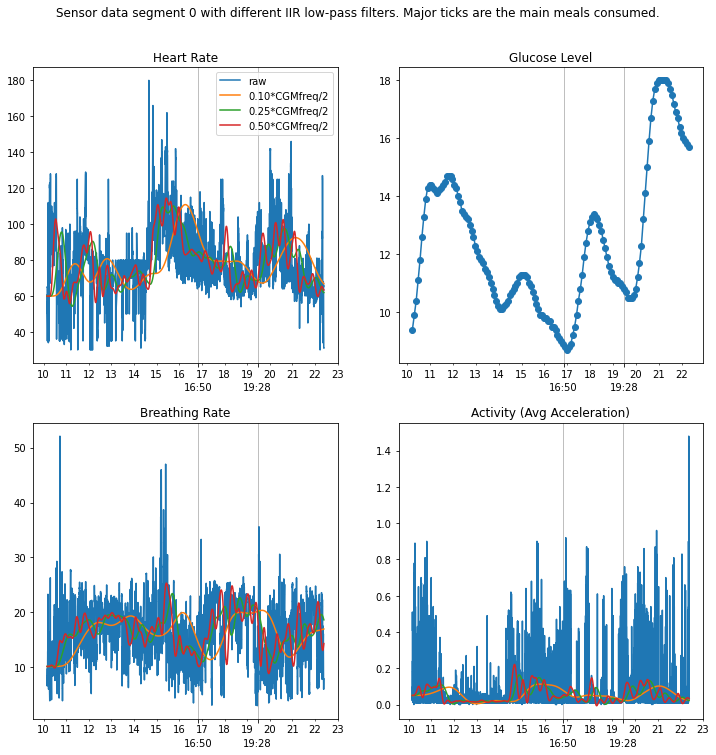

In [38]:
# Plot the results from IIR low-pass filtering

from scipy.ndimage.interpolation import shift

acausal_filter = False
#Setting to True is useful for post-processing (understanding relations between variables without delays) 
#whereas setting to False reflects the delay that will be introduced when filter will be used in real-time

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=[12,12])
fig.suptitle('Sensor data segment {seg} with different IIR low-pass filters. Major ticks are the main meals consumed.'.format(seg=segment_to_show),y=0.95)

axes[0,0].plot(Summary_i_df_seg['HR'])
axes[0,0].set_title('Heart Rate')

axes[0,1].plot(glucose_i_df_seg['glucose'],marker='o')
axes[0,1].set_title('Glucose Level')

axes[1,0].plot(Summary_i_df_seg['BR'])
axes[1,0].set_title('Breathing Rate')

axes[1,1].plot(Summary_i_df_seg['Activity'])
axes[1,1].set_title('Activity (Avg Acceleration)')

for k,l in np.ndindex((2,2)):
    axes[k,l].xaxis.set_minor_locator(dates.HourLocator())
    axes[k,l].xaxis.set_minor_formatter(dates.DateFormatter('%H')) 
    axes[k,l].xaxis.set_major_locator(ticker.FixedLocator(dates.date2num(meals_allinfo_i_df_seg.index))) 
    axes[k,l].xaxis.set_major_formatter(dates.DateFormatter('\n%H:%M')) 
    axes[k,l].xaxis.grid(True)

#IIR cutoffs to try
IIR_cutoff_labels = ['{fcut:.2f}*CGMfreq/2'.format(fcut=cutoff) for cutoff in IIR_cutoff_fractions]

IIR_cutoff_labels_ext = ['raw'] + IIR_cutoff_labels


for k, label in enumerate(IIR_cutoff_labels):

    #new version with second-order-sections implementation (more robust):
    if (acausal_filter==True):
        #Filtering in both directions with 'filtfilt' gets rid of the phase lag
        axes[0,0].plot(Summary_i_df_seg.index,signal.sosfiltfilt(CGMlike_lowpass_IIRs_sos[k], Summary_i_df_seg['HR']))
        axes[1,0].plot(Summary_i_df_seg.index,signal.sosfiltfilt(CGMlike_lowpass_IIRs_sos[k], Summary_i_df_seg['BR']))
        axes[1,1].plot(Summary_i_df_seg.index,signal.sosfiltfilt(CGMlike_lowpass_IIRs_sos[k], Summary_i_df_seg['Activity']))
    else:
        axes[0,0].plot(Summary_i_df_seg.index,signal.sosfilt(CGMlike_lowpass_IIRs_sos[k], Summary_i_df_seg['HR'], zi=CGMlike_lowpass_IIRs_zi[k]*np.median(Summary_i_df_seg['HR'].iloc[0:300]))[0])
        axes[1,0].plot(Summary_i_df_seg.index,signal.sosfilt(CGMlike_lowpass_IIRs_sos[k], Summary_i_df_seg['BR'], zi=CGMlike_lowpass_IIRs_zi[k]*np.median(Summary_i_df_seg['BR'].iloc[0:300]))[0])
        axes[1,1].plot(Summary_i_df_seg.index,signal.sosfilt(CGMlike_lowpass_IIRs_sos[k], Summary_i_df_seg['Activity'], zi=CGMlike_lowpass_IIRs_zi[k]*np.median(Summary_i_df_seg['Activity'].iloc[0:300]))[0])
    
    # #old version using transfer function - possibly unstable for orders>=4
    #
    #if (acausal_filter==True):
    #    #Filtering in both directions with 'filtfilt' gets rid of the phase lag
    #    axes[0,0].plot(Summary_i_df_seg.index,signal.filtfilt(CGMlike_lowpass_IIRs_num[k], CGMlike_lowpass_IIRs_den[k], Summary_i_df_seg['HR']))
    #    axes[1,0].plot(Summary_i_df_seg.index,signal.filtfilt(CGMlike_lowpass_IIRs_num[k], CGMlike_lowpass_IIRs_den[k], Summary_i_df_seg['BR']))
    #    axes[1,1].plot(Summary_i_df_seg.index,signal.filtfilt(CGMlike_lowpass_IIRs_num[k], CGMlike_lowpass_IIRs_den[k], Summary_i_df_seg['Activity']))
    #else:
    #    axes[0,0].plot(Summary_i_df_seg.index,signal.lfilter(CGMlike_lowpass_IIRs_num[k], CGMlike_lowpass_IIRs_den[k], Summary_i_df_seg['HR'], zi=CGMlike_lowpass_IIRs_zi[k]*Summary_i_df_seg['HR'].iloc[0])[0])
    #    axes[1,0].plot(Summary_i_df_seg.index,signal.lfilter(CGMlike_lowpass_IIRs_num[k], CGMlike_lowpass_IIRs_den[k], Summary_i_df_seg['BR'], zi=CGMlike_lowpass_IIRs_zi[k]*Summary_i_df_seg['BR'].iloc[0])[0])
    #    axes[1,1].plot(Summary_i_df_seg.index,signal.lfilter(CGMlike_lowpass_IIRs_num[k], CGMlike_lowpass_IIRs_den[k], Summary_i_df_seg['Activity'], zi=CGMlike_lowpass_IIRs_zi[k]*Summary_i_df_seg['Activity'].iloc[0])[0])
    
    axes[0,0].legend(IIR_cutoff_labels_ext)

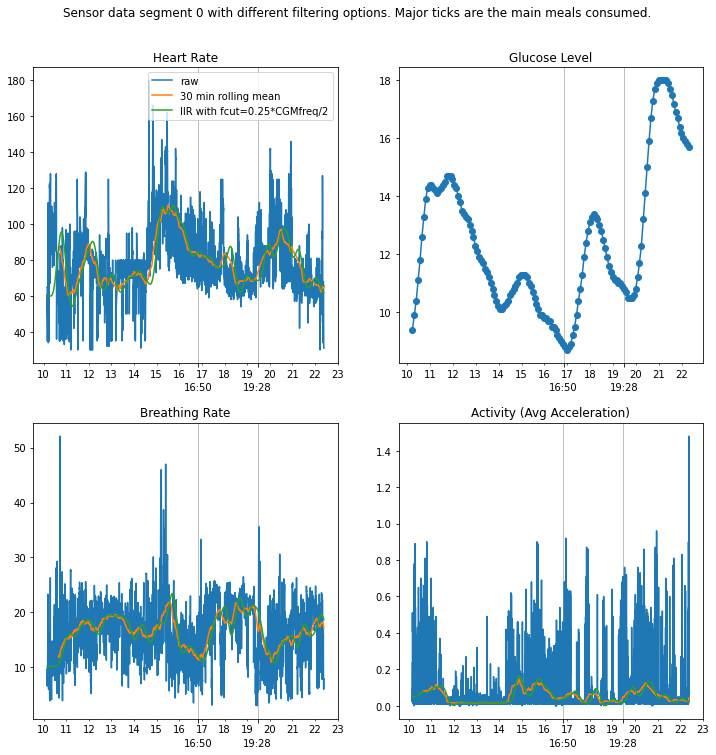

In [39]:
#Compare the results between the best IIR low-pass filter (the one with cutoff frequency 1/10 of CGM Nyquist frequency) 
#with those with the naive 15mins rolling window filtering (causal version without compensating for phase shift)

#rolling window to use
rolling_window_min_label = '30 min rolling mean' #['0 min','5 min','15 min','30 min'] #['0','1',5','10',15','30']
rolling_window_s = 60*int(rolling_window_min_label.split()[0]) 

# #IIR filter to use:
IIR_filter_idx = 1
# #Recall that:
#IIR_cutoff_fractions = np.array([1/10, 1/4, 1/2])
#cutoffs_to_try = max_cutoff*IIR_cutoff_fractions
#and for each value of cutoff I already computed:
#CGMlike_lowpass_IIRs_num[IIR_filter_idx]
#CGMlike_lowpass_IIRs_den[IIR_filter_idx]
#CGMlike_lowpass_IIRs_zi[IIR_filter_idx]
IIR_cutoff_label = 'IIR with fcut={fcut:.2f}*CGMfreq/2'.format(fcut=IIR_cutoff_fractions[IIR_filter_idx])


from scipy.ndimage.interpolation import shift

acausal_filter = False
#Setting to True is useful for post-processing (understanding relations between variables without delays) 
#whereas setting to False reflects the delay that will be introduced when filter will be used in real-time

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=[12,12])
fig.suptitle('Sensor data segment {seg} with different filtering options. Major ticks are the main meals consumed.'.format(seg=segment_to_show),y=0.95)

#plot the raw data first:
axes[0,0].plot(Summary_i_df_seg['HR'])
axes[0,0].set_title('Heart Rate')

axes[0,1].plot(glucose_i_df_seg['glucose'],marker='o')
axes[0,1].set_title('Glucose Level')

axes[1,0].plot(Summary_i_df_seg['BR'])
axes[1,0].set_title('Breathing Rate')

axes[1,1].plot(Summary_i_df_seg['Activity'])
axes[1,1].set_title('Activity (Avg Acceleration)')

for k,l in np.ndindex((2,2)):
    axes[k,l].xaxis.set_minor_locator(dates.HourLocator())
    axes[k,l].xaxis.set_minor_formatter(dates.DateFormatter('%H')) 
    axes[k,l].xaxis.set_major_locator(ticker.FixedLocator(dates.date2num(meals_allinfo_i_df_seg.index))) 
    axes[k,l].xaxis.set_major_formatter(dates.DateFormatter('\n%H:%M')) 
    axes[k,l].xaxis.grid(True)
        
#rolling mean filtering:
if (acausal_filter==True):
    #I will compensate for the phase lag introduced by the rolling mean filter, which is in seconds (and hence number of samples)
    phase_lag_s = int(rolling_window_s/2) 
    axes[0,0].plot(Summary_i_df_seg['HR'].rolling(window=rolling_window_s).mean().shift(-phase_lag_s))
    axes[1,0].plot(Summary_i_df_seg['BR'].rolling(window=rolling_window_s).mean().shift(-phase_lag_s))
    axes[1,1].plot(Summary_i_df_seg['Activity'].rolling(window=rolling_window_s).mean().shift(-phase_lag_s))
else:
    axes[0,0].plot(Summary_i_df_seg['HR'].rolling(window=rolling_window_s).mean())
    axes[1,0].plot(Summary_i_df_seg['BR'].rolling(window=rolling_window_s).mean())
    axes[1,1].plot(Summary_i_df_seg['Activity'].rolling(window=rolling_window_s).mean())
    
#IIR filtering:

#new version with second-order-sections implementation (more robust):
if (acausal_filter==True):
    #Filtering in both directions with 'filtfilt' gets rid of the phase lag
    axes[0,0].plot(Summary_i_df_seg.index,signal.sosfiltfilt(CGMlike_lowpass_IIRs_sos[IIR_filter_idx], Summary_i_df_seg['HR']))
    axes[1,0].plot(Summary_i_df_seg.index,signal.sosfiltfilt(CGMlike_lowpass_IIRs_sos[IIR_filter_idx], Summary_i_df_seg['BR']))
    axes[1,1].plot(Summary_i_df_seg.index,signal.sosfiltfilt(CGMlike_lowpass_IIRs_sos[IIR_filter_idx], Summary_i_df_seg['Activity']))
else:
    axes[0,0].plot(Summary_i_df_seg.index,signal.sosfilt(CGMlike_lowpass_IIRs_sos[IIR_filter_idx], Summary_i_df_seg['HR'], zi=CGMlike_lowpass_IIRs_zi[IIR_filter_idx]*np.median(Summary_i_df_seg['HR'].iloc[0:300]))[0])
    axes[1,0].plot(Summary_i_df_seg.index,signal.sosfilt(CGMlike_lowpass_IIRs_sos[IIR_filter_idx], Summary_i_df_seg['BR'], zi=CGMlike_lowpass_IIRs_zi[IIR_filter_idx]*np.median(Summary_i_df_seg['BR'].iloc[0:300]))[0])
    axes[1,1].plot(Summary_i_df_seg.index,signal.sosfilt(CGMlike_lowpass_IIRs_sos[IIR_filter_idx], Summary_i_df_seg['Activity'], zi=CGMlike_lowpass_IIRs_zi[IIR_filter_idx]*np.median(Summary_i_df_seg['Activity'].iloc[0:300]))[0])

#old version using transfer function - possibly unstable for orders>=4
#if (acausal_filter==True):
#    #Filtering in both directions with 'filtfilt' gets rid of the phase lag
#    axes[0,0].plot(Summary_i_df_seg.index,signal.filtfilt(CGMlike_lowpass_IIRs_num[IIR_filter_idx], CGMlike_lowpass_IIRs_den[IIR_filter_idx], Summary_i_df_seg['HR']))
#    axes[1,0].plot(Summary_i_df_seg.index,signal.filtfilt(CGMlike_lowpass_IIRs_num[IIR_filter_idx], CGMlike_lowpass_IIRs_den[IIR_filter_idx], Summary_i_df_seg['BR']))
#    axes[1,1].plot(Summary_i_df_seg.index,signal.filtfilt(CGMlike_lowpass_IIRs_num[IIR_filter_idx], CGMlike_lowpass_IIRs_den[IIR_filter_idx], Summary_i_df_seg['Activity']))
#else:
#    axes[0,0].plot(Summary_i_df_seg.index,signal.lfilter(CGMlike_lowpass_IIRs_num[IIR_filter_idx], CGMlike_lowpass_IIRs_den[IIR_filter_idx], Summary_i_df_seg['HR'], zi=CGMlike_lowpass_IIRs_zi[IIR_filter_idx]*Summary_i_df_seg['HR'].iloc[0])[0])
#    axes[1,0].plot(Summary_i_df_seg.index,signal.lfilter(CGMlike_lowpass_IIRs_num[IIR_filter_idx], CGMlike_lowpass_IIRs_den[IIR_filter_idx], Summary_i_df_seg['BR'], zi=CGMlike_lowpass_IIRs_zi[IIR_filter_idx]*Summary_i_df_seg['BR'].iloc[0])[0])
#    axes[1,1].plot(Summary_i_df_seg.index,signal.lfilter(CGMlike_lowpass_IIRs_num[IIR_filter_idx], CGMlike_lowpass_IIRs_den[IIR_filter_idx], Summary_i_df_seg['Activity'], zi=CGMlike_lowpass_IIRs_zi[IIR_filter_idx]*Summary_i_df_seg['Activity'].iloc[0])[0])

comparison_labels = ['raw'] + [rolling_window_min_label] + [IIR_cutoff_label] 
axes[0,0].legend(comparison_labels,loc='best');
    

#### Apply the best smoothing technique/parameter to all the segments of sensor data

Looks like the IIR low-pass filtered version of the data is the best for 
comparison with the smooth CGM glucose measurements - so let's apply this smoothing technique to 
all the segments of sensor data

In [40]:
import scipy
from scipy import signal

#IIR low-pass filter design (Butterworth)

#Cutoff frequency should relate to the max value of frequency content in the glucose measurement signal,
#which is half the CGM sampling frequency:
max_cutoff = CGM_glucose_f_Hz/2

IIR_cutoff_fraction = 1/4
IIR_cutoff = max_cutoff*IIR_cutoff_fraction

IIR_cutoff_label = 'IIR low-pass with fcut={fcut:.2f}*CGMfreq/2'.format(fcut=IIR_cutoff_fraction)

IIR_order = 5  

acausal_filter = False
#Setting to True is useful for post-processing (understanding relations between variables without delays) 
#whereas setting to False reflects the delay that will be introduced when filter will be used in real-time

#new version with second-order-sections implementation (more robust):
CGMlike_lowpass_IIR_sos = signal.butter(IIR_order, IIR_cutoff, fs=Summary_f_Hz, output='sos')
#set initial conditions as well
CGMlike_lowpass_IIR_zi = signal.sosfilt_zi(CGMlike_lowpass_IIR_sos)

# #old version using transfer function - possibly unstable for orders>=4
#
#CGMlike_lowpass_IIR_num, CGMlike_lowpass_IIR_den = signal.butter(IIR_order, IIR_cutoff, fs=Summary_f_Hz)
# #set initial conditions as well
#CGMlike_lowpass_IIR_zi = signal.lfilter_zi(CGMlike_lowpass_IIR_num, CGMlike_lowpass_IIR_den)



In [41]:
#Here is the actual loop extracting each segment of sensor data, smoothing it, and recombining all segments together

try:
    del Summary_i_df_forCGM
except NameError:
    pass

for segment in Summary_i_df['Sensor segment'].unique():
    
    Summary_i_df_seg = Summary_i_df[Summary_i_df['Sensor segment']==segment]
    
    #I first need to set the frequency of the timeindices in order to apply filtering techniques (FIR, IIR, etc.)
    Summary_i_df_seg.index.freq = Summary_i_df_seg.index.inferred_freq
    
    #I create new columns with the smooth versions of each sensor signal of interest

    #new version with second-order-sections implementation (more robust):
    if (acausal_filter==True):
        #Filtering in both directions with 'filtfilt' gets rid of the phase lag
        Summary_i_df_seg['HR_smooth']=signal.sosfiltfilt(CGMlike_lowpass_IIR_sos, Summary_i_df_seg['HR'])
        Summary_i_df_seg['BR_smooth']=signal.sosfiltfilt(CGMlike_lowpass_IIR_sos, Summary_i_df_seg['BR'])
        Summary_i_df_seg['Activity_smooth']=signal.sosfiltfilt(CGMlike_lowpass_IIR_sos, Summary_i_df_seg['Activity'])
        #The following is not really needed because once smoothed PeakAccel is just like Activity:
        #Summary_i_df_seg['PeakAccel_smooth']=signal.sosfiltfilt(CGMlike_lowpass_IIR_sos, Summary_i_df_seg['PeakAccel'])
    else:
        Summary_i_df_seg['HR_smooth']=signal.sosfilt(CGMlike_lowpass_IIR_sos, Summary_i_df_seg['HR'], zi=CGMlike_lowpass_IIR_zi*np.median(Summary_i_df_seg['HR'].iloc[0:300]))[0]
        Summary_i_df_seg['BR_smooth']=signal.sosfilt(CGMlike_lowpass_IIR_sos, Summary_i_df_seg['BR'], zi=CGMlike_lowpass_IIR_zi*np.median(Summary_i_df_seg['BR'].iloc[0:300]))[0]
        Summary_i_df_seg['Activity_smooth']=signal.sosfilt(CGMlike_lowpass_IIR_sos, Summary_i_df_seg['Activity'], zi=CGMlike_lowpass_IIR_zi*np.median(Summary_i_df_seg['Activity'].iloc[0:300]))[0]
        #The following is not really needed because once smoothed PeakAccel is just like Activity:
        #Summary_i_df_seg['PeakAccel_smooth']=signal.sosfilt(CGMlike_lowpass_IIR_sos, Summary_i_df_seg['PeakAccel'], zi=CGMlike_lowpass_IIR_zi*np.median(Summary_i_df_seg['Activity'].iloc[0:300]))[0]
    
    # #old version using transfer function - possibly unstable for orders>=4
    #if (acausal_filter==True):
    #    #Filtering in both directions with 'filtfilt' gets rid of the phase lag
    #    Summary_i_df_seg['HR_smooth']=signal.filtfilt(CGMlike_lowpass_IIR_num, CGMlike_lowpass_IIR_den, Summary_i_df_seg['HR'])
    #    Summary_i_df_seg['BR_smooth']=signal.filtfilt(CGMlike_lowpass_IIR_num, CGMlike_lowpass_IIR_den, Summary_i_df_seg['BR'])
    #    Summary_i_df_seg['Activity_smooth']=signal.filtfilt(CGMlike_lowpass_IIR_num, CGMlike_lowpass_IIR_den, Summary_i_df_seg['Activity'])
    #    #The following is not really needed because once smoothed PeakAccel is just like Activity:
    #    #Summary_i_df_seg['PeakAccel_smooth']=signal.filtfilt(CGMlike_lowpass_IIR_num, CGMlike_lowpass_IIR_den, Summary_i_df_seg['PeakAccel'])
    #else:
    #    Summary_i_df_seg['HR_smooth']=signal.lfilter(CGMlike_lowpass_IIR_num, CGMlike_lowpass_IIR_den, Summary_i_df_seg['HR'], zi=CGMlike_lowpass_IIR_zi*Summary_i_df_seg['HR'].iloc[0])[0]
    #    Summary_i_df_seg['BR_smooth']=signal.lfilter(CGMlike_lowpass_IIR_num, CGMlike_lowpass_IIR_den, Summary_i_df_seg['BR'], zi=CGMlike_lowpass_IIR_zi*Summary_i_df_seg['BR'].iloc[0])[0]
    #    Summary_i_df_seg['Activity_smooth']=signal.lfilter(CGMlike_lowpass_IIR_num, CGMlike_lowpass_IIR_den, Summary_i_df_seg['Activity'], zi=CGMlike_lowpass_IIR_zi*Summary_i_df_seg['Activity'].iloc[0])[0]
    #    #The following is not really needed because once smoothed PeakAccel is just like Activity:
    #    #Summary_i_df_seg['PeakAccel_smooth']=signal.lfilter(CGMlike_lowpass_IIR_num, CGMlike_lowpass_IIR_den, Summary_i_df_seg['PeakAccel'], zi=CGMlike_lowpass_IIR_zi*Summary_i_df_seg['Activity'].iloc[0])[0]
    
    #Now I reset the frequency of the timeseries to 'None' otherwise when I concatenate all the time segments it will fill 
    #all periods between the sensor data segments with 'NaN' values at 1Hz
    Summary_i_df_seg.index.freq = None
    
    
    #Note: I don't need to keep the raw sensor data for this dataframe that will be compared with CGM glucose measurements
    
    try:
        Summary_i_df_forCGM = pd.concat([Summary_i_df_forCGM,Summary_i_df_seg[['Sensor segment','HR_smooth','BR_smooth','Activity_smooth']]]) 
    except NameError: #if this is the first segment of experimental data
        Summary_i_df_forCGM = Summary_i_df_seg[['Sensor segment','HR_smooth','BR_smooth','Activity_smooth']]
    

    
#Optionally, I would have to do something similar on the breathing sensing data (downsampled to 1Hz): Breathing_i_df_1Hz['BreathingWaveform']

    

In [42]:
Summary_i_df_forCGM


,Sensor segment,HR_smooth,BR_smooth,Activity_smooth
Time,,,,
2014-10-01 10:09:39,0,59.928571,10.150000,0.050000
2014-10-01 10:09:40,0,59.928571,10.150000,0.050000
2014-10-01 10:09:41,0,59.928571,10.150000,0.050000
2014-10-01 10:09:42,0,59.928571,10.150000,0.050000
2014-10-01 10:09:43,0,59.928571,10.150000,0.050000
...,...,...,...,...
2014-10-04 13:47:56,3,71.573919,11.266321,0.075572
2014-10-04 13:47:57,3,71.576129,11.265448,0.075532
2014-10-04 13:47:58,3,71.578351,11.264585,0.075493


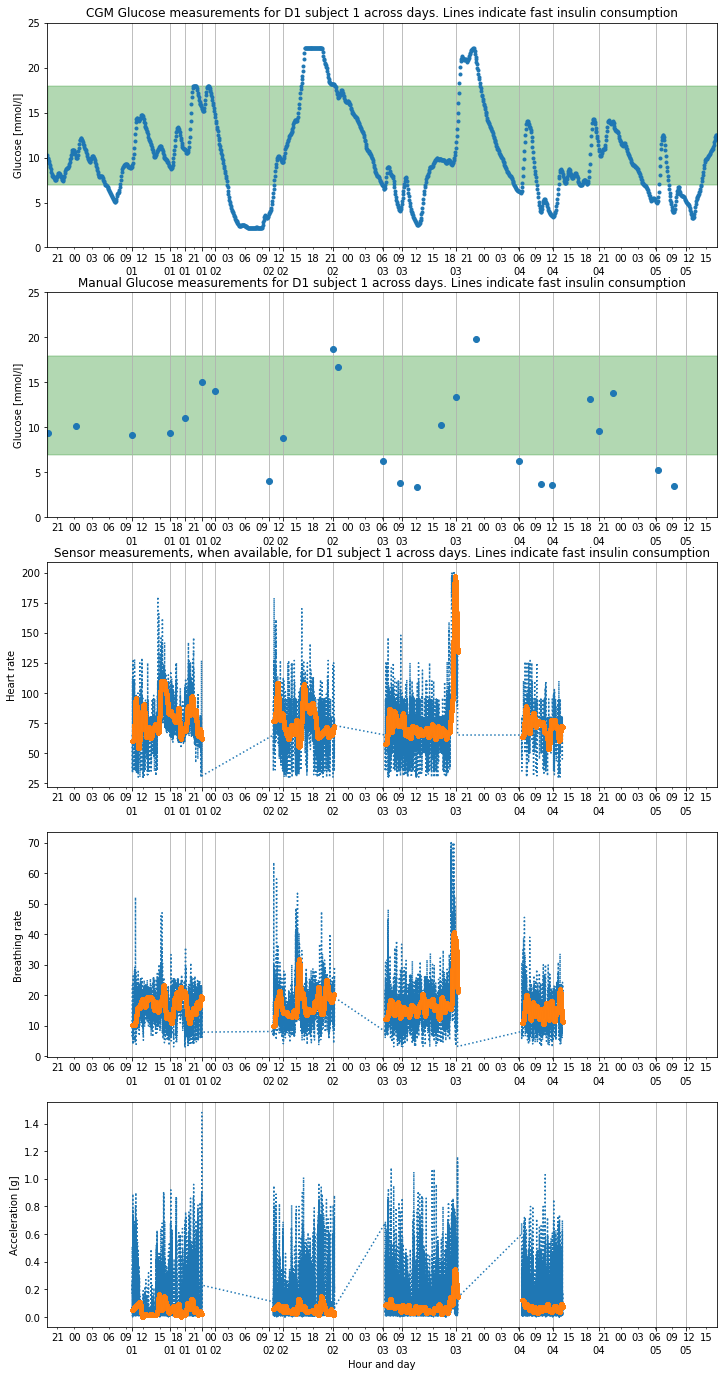

In [43]:
#Now repeat the plot of glucose as earlier, but add the evolution of sensor data (when available) throughout the experiment

if (subfolders_to_select[i].split('/')[-3]==D1_CGM_folder.split('/')[-2]): 
    #for D1 subjects with CGM
    
    fig, axes = plt.subplots(nrows=5, ncols=1, figsize=[12,24])
    axes[0].set_title('CGM Glucose measurements for D1 subject {} across days. Lines indicate fast insulin consumption'.format(D1_CGM_subj_num),y=1.00)
    axes[0].plot(glucose_i_df['glucose'],marker='.',ls='none')
    axes[1].set_title('Manual Glucose measurements for D1 subject {} across days. Lines indicate fast insulin consumption'.format(D1_CGM_subj_num),y=1.00)
    axes[1].plot(manual_glucose_i_df['glucose'],marker='o',ls='none')
    axes[2].set_title('Sensor measurements, when available, for D1 subject {} across days. Lines indicate fast insulin consumption'.format(D1_CGM_subj_num),y=1.00)
    #axes[2].set_title('Heart rate for D1 subject {} across days. Lines indicate fast insulin consumption'.format(D1_CGM_subj_num),y=1.00)
    axes[2].plot(Summary_i_df['HR'],ls=':') 
    axes[2].plot(Summary_i_df_forCGM['HR_smooth'],marker='.',ls='none') 
    axes[2].set_ylabel('Heart rate')
    #axes[3].set_title('Breathing rate for D1 subject {} across days. Lines indicate fast insulin consumption'.format(D1_CGM_subj_num),y=1.00)
    axes[3].plot(Summary_i_df['BR'],ls=':') 
    axes[3].plot(Summary_i_df_forCGM['BR_smooth'],marker='.',ls='none') 
    axes[3].set_ylabel('Breathing rate')
    #axes[4].set_title('Activity (mean accel) for D1 subject {} across days. Lines indicate fast insulin consumption'.format(D1_CGM_subj_num),y=1.00)
    axes[4].plot(Summary_i_df['Activity'],ls=':') 
    axes[4].plot(Summary_i_df_forCGM['Activity_smooth'],marker='.',ls='none') 
    axes[4].set_ylabel('Acceleration [g]')
    #axes[5].set_title('Peak Accel. for D1 subject {} across days. Lines indicate fast insulin consumption'.format(D1_CGM_subj_num),y=1.00)
    #axes[5].plot(Summary_i_df['PeakAccel'],ls=':') 
    #axes[5].plot(Summary_i_df_forCGM['PeakAccel_smooth'],marker='.',ls='none') 
    #axes[5].set_ylabel('Acceleration [g]')
    axes[-1].set_xlabel('Hour and day')

    for k in range(0,len(axes)):
        axes[k].set_xlim([glucose_i_df.index[0],glucose_i_df.index[-1]])
        axes[k].xaxis.set_minor_locator(dates.HourLocator(interval = 3))
        axes[k].xaxis.set_minor_formatter(dates.DateFormatter('%H')) 
        axes[k].xaxis.set_major_locator(ticker.FixedLocator(dates.date2num(fast_insulin_i_df.index))) #(insulin_i_df.index))) 
        axes[k].xaxis.set_major_formatter(dates.DateFormatter('\n%d')) #('\n%D, %H:%M')) 
        axes[k].xaxis.grid(True)
        
    for k in range(0,2):    
        axes[k].set_ylim([0,25])
        axes[k].set_ylabel('Glucose [mmol/l]')
        axes[k].fill_between(x=glucose_i_df.index,y1=7,y2=18,alpha=0.3,color='green')



## Combine sensor data with glucose readings and insulin information, to start modeling glucose evolution in time 

#### Glucose is already sampled every 5 minutes by CGM, so I use the smoothed version of the sensor data computed earlier, downsample every 5 mins to match CGM data and see if sensor data can help explain glucose evolution

In [44]:
#Downsample the smoothed sensor data to keep only the values at timestamps that match those 
#of the CGM glucose measurements, and concatenate with the dataframe of glucose measurements

sensor_CGM_shared_timeindices = Summary_i_df_forCGM.index.intersection(glucose_i_df.index)

#Create a new dataframe concatenating glucose and (smoothed) sensor data
Summary_sensor_CGM_i_df = pd.concat([Summary_i_df_forCGM.loc[sensor_CGM_shared_timeindices],glucose_i_df[['glucose','type']]],axis=1)



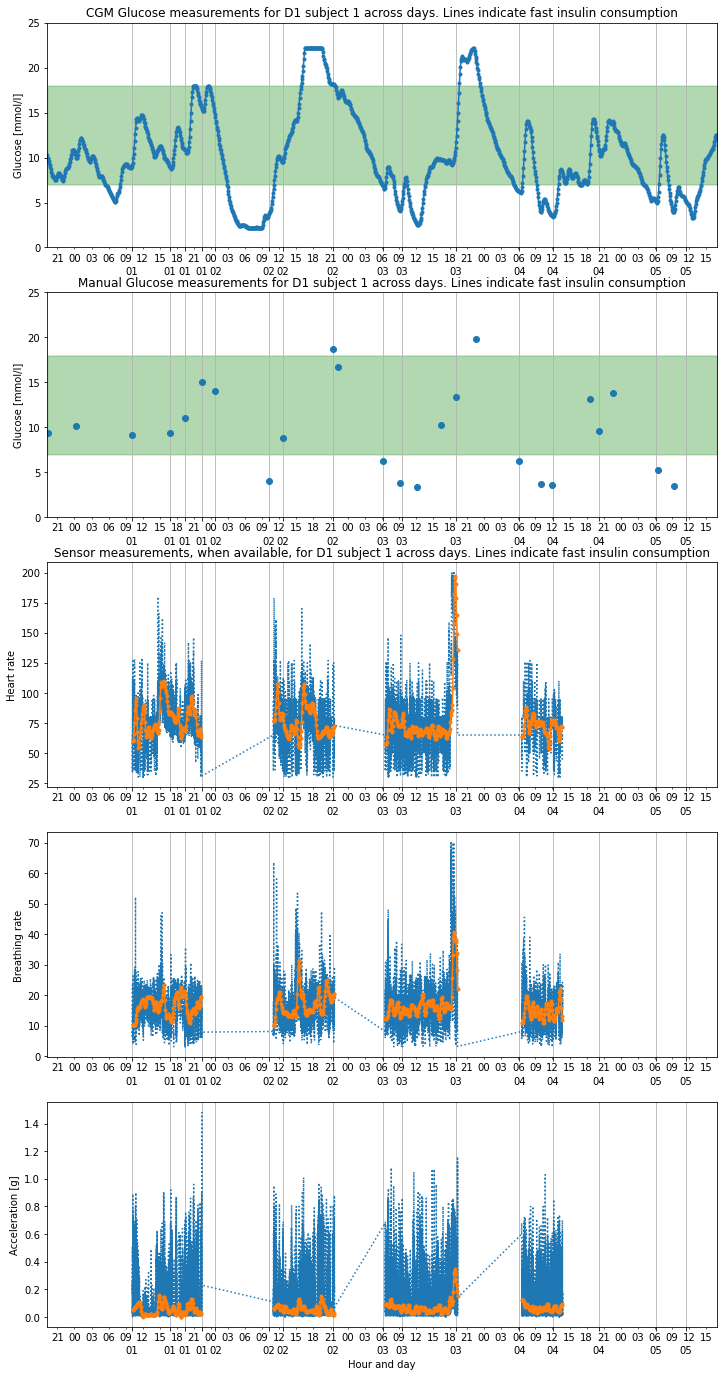

In [45]:
#Repeat the figure before but with the reduced samples

if (subfolders_to_select[i].split('/')[-3]==D1_CGM_folder.split('/')[-2]): 
    #for D1 subjects with CGM
    
    fig, axes = plt.subplots(nrows=5, ncols=1, figsize=[12,24])
    axes[0].set_title('CGM Glucose measurements for D1 subject {} across days. Lines indicate fast insulin consumption'.format(D1_CGM_subj_num),y=1.00)
    axes[0].plot(Summary_sensor_CGM_i_df['glucose'],marker='.',ls='-', lw=1.5)
    axes[1].set_title('Manual Glucose measurements for D1 subject {} across days. Lines indicate fast insulin consumption'.format(D1_CGM_subj_num),y=1.00)
    axes[1].plot(manual_glucose_i_df['glucose'],marker='o',ls='none')
    axes[2].set_title('Sensor measurements, when available, for D1 subject {} across days. Lines indicate fast insulin consumption'.format(D1_CGM_subj_num),y=1.00)
    #axes[2].set_title('Heart rate for D1 subject {} across days. Lines indicate fast insulin consumption'.format(D1_CGM_subj_num),y=1.00)
    axes[2].plot(Summary_i_df['HR'],ls=':') 
    axes[2].plot(Summary_sensor_CGM_i_df['HR_smooth'],marker='.',ls='-', lw=1.5) 
    axes[2].set_ylabel('Heart rate')
    #axes[3].set_title('Breathing rate for D1 subject {} across days. Lines indicate fast insulin consumption'.format(D1_CGM_subj_num),y=1.00)
    axes[3].plot(Summary_i_df['BR'],ls=':') 
    axes[3].plot(Summary_sensor_CGM_i_df['BR_smooth'],marker='.',ls='-', lw=1.5)
    axes[3].set_ylabel('Breathing rate')
    #axes[4].set_title('Activity (mean accel) for D1 subject {} across days. Lines indicate fast insulin consumption'.format(D1_CGM_subj_num),y=1.00)
    axes[4].plot(Summary_i_df['Activity'],ls=':') 
    axes[4].plot(Summary_sensor_CGM_i_df['Activity_smooth'],marker='.',ls='-', lw=1.5)
    axes[4].set_ylabel('Acceleration [g]')
    #axes[5].set_title('Peak Accel. for D1 subject {} across days. Lines indicate fast insulin consumption'.format(D1_CGM_subj_num),y=1.00)
    #axes[5].plot(Summary_i_df['PeakAccel'],ls=':') 
    #axes[5].plot(Summary_i_df_forCGM['PeakAccel_smooth'],marker='.',ls='none') 
    #axes[5].set_ylabel('Acceleration [g]')
    axes[-1].set_xlabel('Hour and day')

    for k in range(0,len(axes)):
        axes[k].set_xlim([Summary_sensor_CGM_i_df.index[0],Summary_sensor_CGM_i_df.index[-1]])
        axes[k].xaxis.set_minor_locator(dates.HourLocator(interval = 3))
        axes[k].xaxis.set_minor_formatter(dates.DateFormatter('%H')) 
        axes[k].xaxis.set_major_locator(ticker.FixedLocator(dates.date2num(fast_insulin_i_df.index))) #(insulin_i_df.index))) 
        axes[k].xaxis.set_major_formatter(dates.DateFormatter('\n%d')) #('\n%D, %H:%M')) 
        axes[k].xaxis.grid(True)
        
    for k in range(0,2):    
        axes[k].set_ylim([0,25])
        axes[k].set_ylabel('Glucose [mmol/l]')
        axes[k].fill_between(x=Summary_sensor_CGM_i_df.index,y1=7,y2=18,alpha=0.3,color='green')



In [46]:
Summary_sensor_CGM_i_df

,Sensor segment,HR_smooth,BR_smooth,Activity_smooth,glucose,type
2014-09-30 19:14:00,NaN,NaN,NaN,NaN,10.3,cgm
2014-09-30 19:19:00,NaN,NaN,NaN,NaN,9.9,cgm
2014-09-30 19:24:00,NaN,NaN,NaN,NaN,9.8,cgm
2014-09-30 19:29:00,NaN,NaN,NaN,NaN,9.6,cgm
2014-09-30 19:34:00,NaN,NaN,NaN,NaN,9.4,cgm
...,...,...,...,...,...,...
2014-10-05 16:34:00,NaN,NaN,NaN,NaN,12.3,cgm
2014-10-05 16:39:00,NaN,NaN,NaN,NaN,12.5,cgm
2014-10-05 16:44:00,NaN,NaN,NaN,NaN,12.5,cgm
2014-10-05 16:49:00,NaN,NaN,NaN,NaN,12.3,cgm


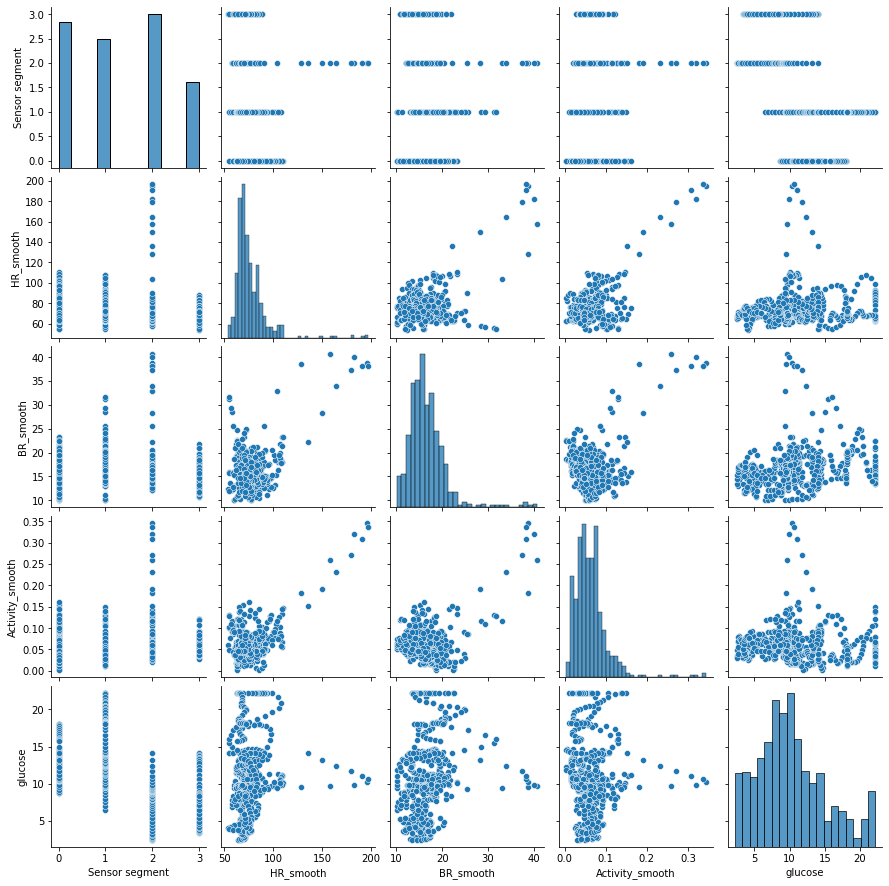

In [47]:
sns.pairplot(Summary_sensor_CGM_i_df,palette='coolwarm')

In [48]:
Summary_sensor_CGM_i_df.describe()

,Sensor segment,HR_smooth,BR_smooth,Activity_smooth,glucose
count,514.000000,514.000000,514.000000,514.000000,1413.000000
mean,1.348249,76.194917,16.635708,0.063045,10.202831
std,1.063907,17.218510,4.256527,0.041548,4.869129
min,0.000000,53.275137,10.050014,0.002438,2.200000
25%,0.000000,67.079032,14.088555,0.038251,6.900000
50%,1.000000,71.603907,15.945739,0.057021,9.600000
75%,2.000000,81.586589,18.222517,0.077717,12.900000
max,3.000000,197.045306,40.745623,0.344964,22.200000


<AxesSubplot:>

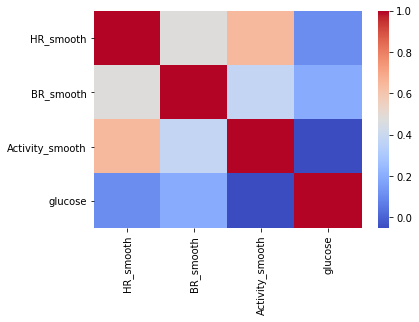

In [49]:
sns.heatmap(Summary_sensor_CGM_i_df.drop('Sensor segment',axis=1).corr(),cmap='coolwarm')

Even with the possibility of spurious correlations because the timsamples are dependent to each other, the values of correlation between glucose level and any of the sensory data I am looking at (HR, BR, Activity) are quite low, suggesting I can't expect a simple and obvious relationship between these variables and glucose

The glucose level is likely to be more directly dependent on the timing from the last fast insulin consumption, 
and the dosage of the latter, so I want to include those variables in an extended dataframe

In [50]:
Summary_sensor_CGM_Ins_i_df = Summary_sensor_CGM_i_df

In [51]:
#compute the distance in time (number of minutes) between each CGM measurement and the last known consumption of fast insulin
#and store the dosage of the last insulin measurement
Summary_sensor_CGM_Ins_i_df['min_from_last_dose']=np.nan
Summary_sensor_CGM_Ins_i_df['last_insulin_dose']=np.nan

In [52]:
fast_insulin_i_df

,fast_insulin,slow_insulin,comment,sensor_folder
date_time,,,,
2014-10-01 10:06:00,7,NaN,NaN,2014-10-01
2014-10-01 16:50:00,4,NaN,NaN,2014-10-01
2014-10-01 19:28:00,6,NaN,NaN,2014-10-01
2014-10-01 22:27:00,8,NaN,NaN,2014-10-01
2014-10-02 00:45:00,2,NaN,NaN,2014-10-02
2014-10-02 10:10:00,3,NaN,NaN,2014-10-02
2014-10-02 12:34:00,12,NaN,NaN,2014-10-02
2014-10-02 21:24:00,5,NaN,NaN,2014-10-02
2014-10-03 06:11:00,9,NaN,NaN,2014-10-03


In [53]:
for k in range(len(fast_insulin_i_df.index)-1): #, timestamp in enumerate(fast_insulin_i_df.index):
    Summary_sensor_CGM_Ins_i_df.loc[(fast_insulin_i_df.index[k]):(fast_insulin_i_df.index[k+1]),'last_insulin_dose']=fast_insulin_i_df.iloc[k]['fast_insulin']
    Summary_sensor_CGM_Ins_i_df.loc[(fast_insulin_i_df.index[k]):(fast_insulin_i_df.index[k+1]),'min_from_last_dose']= \
       Summary_sensor_CGM_i_df.loc[(fast_insulin_i_df.index[k]):(fast_insulin_i_df.index[k+1])].index - fast_insulin_i_df.index[k]
    
# #take care of timestamps after the last insulin dosage    
Summary_sensor_CGM_Ins_i_df.loc[(fast_insulin_i_df.index[len(fast_insulin_i_df.index)-1]):,'last_insulin_dose']=fast_insulin_i_df.iloc[len(fast_insulin_i_df.index)-1]['fast_insulin']
Summary_sensor_CGM_Ins_i_df.loc[(fast_insulin_i_df.index[len(fast_insulin_i_df.index)-1]):,'min_from_last_dose']= \
       Summary_sensor_CGM_Ins_i_df.loc[(fast_insulin_i_df.index[len(fast_insulin_i_df.index)-1]):].index - fast_insulin_i_df.index[len(fast_insulin_i_df.index)-1]


In [54]:
Summary_sensor_CGM_Ins_i_df['min_from_last_dose'] = Summary_sensor_CGM_Ins_i_df['min_from_last_dose'].apply(lambda x: x if type(x)==float else x.total_seconds()/60)

In [55]:
Summary_sensor_CGM_Ins_i_df

,Sensor segment,HR_smooth,BR_smooth,Activity_smooth,glucose,type,min_from_last_dose,last_insulin_dose
2014-09-30 19:14:00,NaN,NaN,NaN,NaN,10.3,cgm,NaN,NaN
2014-09-30 19:19:00,NaN,NaN,NaN,NaN,9.9,cgm,NaN,NaN
2014-09-30 19:24:00,NaN,NaN,NaN,NaN,9.8,cgm,NaN,NaN
2014-09-30 19:29:00,NaN,NaN,NaN,NaN,9.6,cgm,NaN,NaN
2014-09-30 19:34:00,NaN,NaN,NaN,NaN,9.4,cgm,NaN,NaN
...,...,...,...,...,...,...,...,...
2014-10-05 16:34:00,NaN,NaN,NaN,NaN,12.3,cgm,304.0,11.0
2014-10-05 16:39:00,NaN,NaN,NaN,NaN,12.5,cgm,309.0,11.0
2014-10-05 16:44:00,NaN,NaN,NaN,NaN,12.5,cgm,314.0,11.0
2014-10-05 16:49:00,NaN,NaN,NaN,NaN,12.3,cgm,319.0,11.0


In [56]:
Summary_sensor_CGM_Ins_i_df = Summary_sensor_CGM_Ins_i_df.dropna(subset=['min_from_last_dose'])

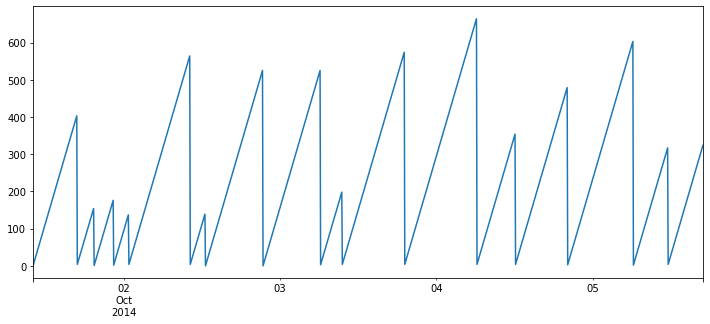

In [57]:
Summary_sensor_CGM_Ins_i_df['min_from_last_dose'].plot(figsize=[12,5]);

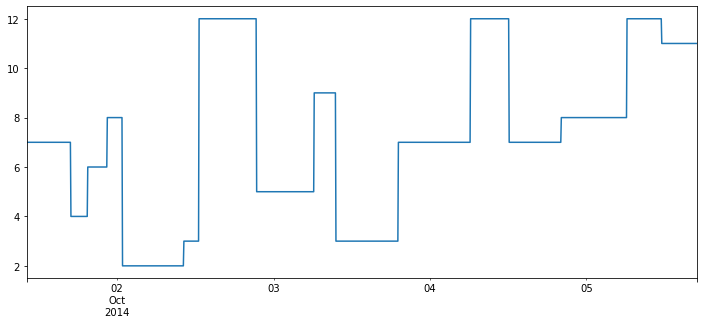

In [58]:
Summary_sensor_CGM_Ins_i_df['last_insulin_dose'].plot(figsize=[12,5]);

In [59]:
#I also convert the new variables to integer to make the model computations faster
Summary_sensor_CGM_Ins_i_df[['min_from_last_dose','last_insulin_dose']] = Summary_sensor_CGM_Ins_i_df[['min_from_last_dose','last_insulin_dose']].astype(int)

In [60]:
# #This is if I optionally also want to create an integer glucose level, by multiplying by 10 (since values have 1 decimal value) 
#Summary_sensor_CGM_Ins_i_df['glucose10x']=10*Summary_sensor_CGM_Ins_i_df['glucose']
#Summary_sensor_CGM_Ins_i_df['glucose10x']=Summary_sensor_CGM_Ins_i_df['glucose10x'].astype(int)

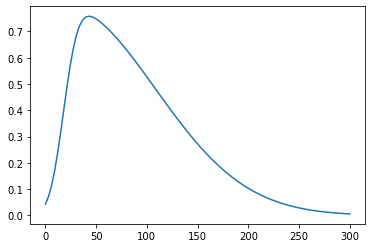

In [61]:
#Let's try to also build a smarter timeseries that represents a somewhat realistic curve of the effect of insulin dosage over time
from scipy.stats import skewnorm

def insulin_effect(min_from_last_dose,last_insulin_dose,skewness=8):
    return last_insulin_dose*skewnorm.pdf((float(min_from_last_dose)/90)-0.2, skewness)

#example curve:
skewed_sample_curve = [insulin_effect(x,1) for x in np.linspace(0,300,100)]
#skewed_sample_curve = [skewnorm.pdf((x/30)-0.5, 6) for x in np.linspace(0,200,100)]
plt.plot(np.linspace(0,300,100),skewed_sample_curve)

In [62]:
#Apply the above function to create a new column
Summary_sensor_CGM_Ins_i_df['insulin_effect'] = Summary_sensor_CGM_Ins_i_df[['min_from_last_dose','last_insulin_dose']].apply(lambda x:insulin_effect(x[0],x[1]),axis=1)

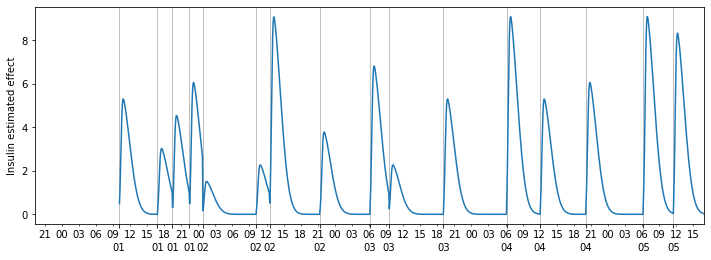

In [63]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[12,4])
ax.plot(Summary_sensor_CGM_Ins_i_df['insulin_effect'])
ax.set_ylabel('Insulin estimated effect')
ax.set_xlim([Summary_sensor_CGM_i_df.index[0],Summary_sensor_CGM_i_df.index[-1]])
ax.xaxis.set_minor_locator(dates.HourLocator(interval = 3))
ax.xaxis.set_minor_formatter(dates.DateFormatter('%H')) 
ax.xaxis.set_major_locator(ticker.FixedLocator(dates.date2num(fast_insulin_i_df.index))) #(insulin_i_df.index))) 
ax.xaxis.set_major_formatter(dates.DateFormatter('\n%d')) #('\n%D, %H:%M')) 
ax.xaxis.grid(True)


In [64]:
Summary_sensor_CGM_Ins_i_df

,Sensor segment,HR_smooth,BR_smooth,Activity_smooth,glucose,type,min_from_last_dose,last_insulin_dose,insulin_effect
2014-10-01 10:09:00,NaN,NaN,NaN,NaN,9.2,cgm,3,7,0.502406
2014-10-01 10:14:00,0.0,59.924704,10.149365,0.050057,9.4,cgm,8,7,1.038178
2014-10-01 10:19:00,0.0,59.971261,10.161448,0.051152,9.9,cgm,13,7,1.831129
2014-10-01 10:24:00,0.0,61.240456,10.197405,0.056180,10.4,cgm,18,7,2.792596
2014-10-01 10:29:00,0.0,66.188249,10.207676,0.065843,11.1,cgm,23,7,3.745450
...,...,...,...,...,...,...,...,...,...
2014-10-05 16:34:00,NaN,NaN,NaN,NaN,12.3,cgm,304,11,0.056302
2014-10-05 16:39:00,NaN,NaN,NaN,NaN,12.5,cgm,309,11,0.047117
2014-10-05 16:44:00,NaN,NaN,NaN,NaN,12.5,cgm,314,11,0.039309
2014-10-05 16:49:00,NaN,NaN,NaN,NaN,12.3,cgm,319,11,0.032694


In [65]:
Summary_sensor_CGM_Ins_i_df.dtypes

Sensor segment        float64
HR_smooth             float64
BR_smooth             float64
Activity_smooth       float64
glucose               float64
type                   object
min_from_last_dose      int32
last_insulin_dose       int32
insulin_effect        float64
dtype: object

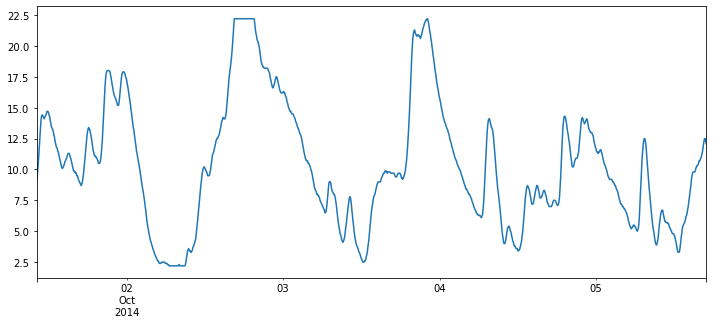

In [66]:
Summary_sensor_CGM_Ins_i_df['glucose'].plot(figsize=[12,5]);

### Traditional time-series analysis techniques

ARIMA modeling

In [67]:
#check for stationarity of the data:

from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.01:
        print("Strong evidence (1% level) against the null hypothesis of non-stationary data")
    elif result[1] <= 0.05: 
        print("Reject the null hypothesis of non-stationary data at the 5% level but not at the 1% level")
    else:
        print("Fail to reject the null hypothesis of non-stationary data")


In [68]:
#The glucose data is close to stationary
adf_test(Summary_sensor_CGM_Ins_i_df['glucose'])

Augmented Dickey-Fuller Test: 
ADF test statistic        -2.835525
p-value                    0.053376
# lags used               10.000000
# observations          1223.000000
critical value (1%)       -3.435708
critical value (5%)       -2.863906
critical value (10%)      -2.568030
Fail to reject the null hypothesis of non-stationary data


In [69]:
#If I take one difference, it becomes strongly stationary
from statsmodels.tsa.statespace.tools import diff
adf_test(diff(Summary_sensor_CGM_Ins_i_df['glucose'],k_diff=1))

Augmented Dickey-Fuller Test: 
ADF test statistic     -8.863346e+00
p-value                 1.462641e-14
# lags used             9.000000e+00
# observations          1.223000e+03
critical value (1%)    -3.435708e+00
critical value (5%)    -2.863906e+00
critical value (10%)   -2.568030e+00
Strong evidence (1% level) against the null hypothesis of non-stationary data


In [70]:
#check for 'seasonality' and 'trend' in the glucose evolution using ETS decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

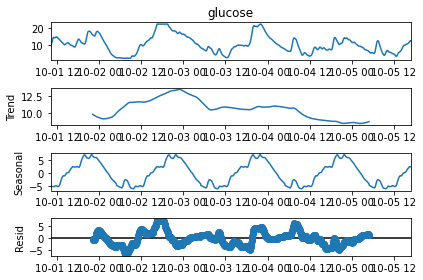

In [71]:
#assume a seasonality of 24 hours, hence 12*24 samples since we have a sample every 5 minutes
ets_result = seasonal_decompose(Summary_sensor_CGM_Ins_i_df['glucose'],model='add',period=12*24)  
ets_result.plot();

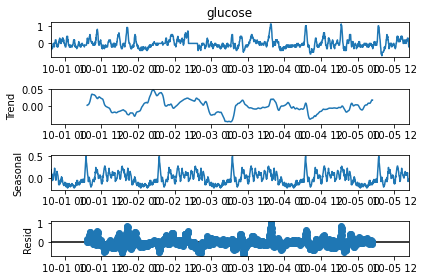

In [72]:
#Let's repeat for the difference signal:
ets_result_diff = seasonal_decompose(diff(Summary_sensor_CGM_i_df['glucose'],k_diff=1),model='add',period=12*24)  
ets_result_diff.plot();

In [73]:
#check the best parameters for an ARIMA model fitting the evolution of glucose in time without any external variable: 

from pmdarima import auto_arima

arima_stepwise_fit = auto_arima(Summary_sensor_CGM_Ins_i_df['glucose'],start_p=0,start_q=0,max_p=10,max_q=10,trace=True,seasonal=False)

# #Would be good to try with a seasonal term with period 1 day, but it's too costly to compute 
#arima_stepwise_fit = auto_arima(Summary_sensor_CGM_Ins_i_df['glucose'],start_p=0,start_q=0,max_p=4,max_q=4,trace=True,seasonal=True,m=12*24,max_P=2,max_Q=2,max_D=1) 

arima_stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=284.634, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-2125.082, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-739.347, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=282.726, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-2123.354, Time=0.32 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-2123.237, Time=0.26 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-2139.556, Time=0.96 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-2330.367, Time=1.02 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-2275.903, Time=0.27 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-2360.372, Time=1.26 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-2362.084, Time=0.83 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-2360.732, Time=1.21 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-2363.767, Time=1.79 sec
 ARIMA(6,1,1)(0,0,0)[0] intercept   : AIC=-2392.271, Time=1.97 sec
 ARIMA(6,1,0)(0,0,0)[0] 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1234
Model:               SARIMAX(7, 1, 0)   Log Likelihood                1207.343
Date:                Thu, 29 Jul 2021   AIC                          -2398.686
Time:                        10:20:56   BIC                          -2357.749
Sample:                             0   HQIC                         -2383.286
                               - 1234                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8129      0.029     27.604      0.000       0.755       0.871
ar.L2          0.4658      0.036     13.053      0.000       0.396       0.536
ar.L3         -0.0544      0.036     -1.519      0.129      -0.125       0.016
ar.L4         -0.3064      0.038     -8.002      0.000      -0.381      -0.231
ar.L5         -0.1911      0.039     -4.873      0.000      -0.268      -0.114
ar.L6          0.0961      0.037      2.629      0.009       0.024       0.168
ar.L7          0.0799      0.029      2.785      0.005       0.024       0.136
sigma2         0.0082      0.000     29.636      0.000       0.008       0.009
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                80.12
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.12   Skew:                            -0.07
Prob(H) (two-sided):                  0.26   Kurtosis:                         4.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [74]:
arima_stepwise_fit.order

(7, 1, 0)

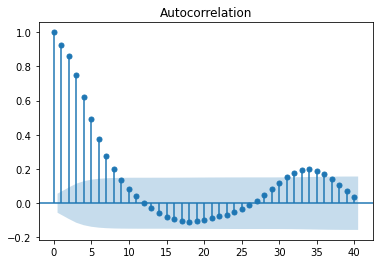

In [75]:
#confirm result of auto_arima with the autocorrelation and partial autocorrelation plots
from statsmodels.tsa.stattools import acf,pacf #,pacf_yw,pacf_ols,acovf

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

plot_acf(diff(Summary_sensor_CGM_Ins_i_df['glucose'],k_diff=1),lags=40);

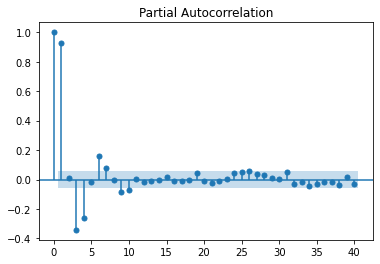

In [76]:
plot_pacf(diff(Summary_sensor_CGM_Ins_i_df['glucose'],k_diff=1),lags=40);

In [77]:
#let's now fit an ARIMA model with the best parameters found by auto_arima on a 'train' section of the data

from statsmodels.tsa.arima_model import ARIMA #,ARIMAResults,ARMA,ARMAResults

#Keep the last 20% of the timestamps as the test set

CGM_train = Summary_sensor_CGM_Ins_i_df.iloc[:(int(len(Summary_sensor_CGM_Ins_i_df)*0.8))]
#CGM_train = Summary_sensor_CGM_Ins_i_df.loc[:'2014-10-03 12:00:00']

CGM_train

,Sensor segment,HR_smooth,BR_smooth,Activity_smooth,glucose,type,min_from_last_dose,last_insulin_dose,insulin_effect
2014-10-01 10:09:00,NaN,NaN,NaN,NaN,9.2,cgm,3,7,0.502406
2014-10-01 10:14:00,0.0,59.924704,10.149365,0.050057,9.4,cgm,8,7,1.038178
2014-10-01 10:19:00,0.0,59.971261,10.161448,0.051152,9.9,cgm,13,7,1.831129
2014-10-01 10:24:00,0.0,61.240456,10.197405,0.056180,10.4,cgm,18,7,2.792596
2014-10-01 10:29:00,0.0,66.188249,10.207676,0.065843,11.1,cgm,23,7,3.745450
...,...,...,...,...,...,...,...,...,...
2014-10-04 19:59:00,NaN,NaN,NaN,NaN,11.8,cgm,474,7,0.000015
2014-10-04 20:04:00,NaN,NaN,NaN,NaN,11.4,cgm,479,7,0.000011
2014-10-04 20:09:00,NaN,NaN,NaN,NaN,11.0,cgm,3,8,0.574178
2014-10-04 20:14:00,NaN,NaN,NaN,NaN,10.7,cgm,8,8,1.186489


In [78]:
#and test the results on the remainder of the time series

#CGM_test = Summary_sensor_CGM_Ins_i_df.loc['2014-10-03 12:00:01':]
CGM_test = Summary_sensor_CGM_Ins_i_df.iloc[(int(len(Summary_sensor_CGM_Ins_i_df)*0.8)):]

CGM_test

,Sensor segment,HR_smooth,BR_smooth,Activity_smooth,glucose,type,min_from_last_dose,last_insulin_dose,insulin_effect
2014-10-04 20:24:00,NaN,NaN,NaN,NaN,10.2,cgm,18,8,3.191538
2014-10-04 20:29:00,NaN,NaN,NaN,NaN,10.2,cgm,23,8,4.280515
2014-10-04 20:34:00,NaN,NaN,NaN,NaN,10.3,cgm,28,8,5.157307
2014-10-04 20:39:00,NaN,NaN,NaN,NaN,10.5,cgm,33,8,5.720858
2014-10-04 20:44:00,NaN,NaN,NaN,NaN,10.7,cgm,38,8,5.992501
...,...,...,...,...,...,...,...,...,...
2014-10-05 16:34:00,NaN,NaN,NaN,NaN,12.3,cgm,304,11,0.056302
2014-10-05 16:39:00,NaN,NaN,NaN,NaN,12.5,cgm,309,11,0.047117
2014-10-05 16:44:00,NaN,NaN,NaN,NaN,12.5,cgm,314,11,0.039309
2014-10-05 16:49:00,NaN,NaN,NaN,NaN,12.3,cgm,319,11,0.032694


In [79]:
arima_model = ARIMA(CGM_train['glucose'],order=arima_stepwise_fit.order)

arima_results = arima_model.fit()
arima_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.glucose   No. Observations:                  986
Model:                 ARIMA(7, 1, 0)   Log Likelihood                 978.210
Method:                       css-mle   S.D. of innovations              0.090
Date:                Thu, 29 Jul 2021   AIC                          -1938.421
Time:                        10:20:57   BIC                          -1894.378
Sample:                    10-01-2014   HQIC                         -1921.670
                         - 10-04-2014                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0008      0.031     -0.027      0.979      -0.062       0.060
ar.L1.D.glucose     0.8068      0.032     25.432      0.000       0.745       0.869
ar.L2.D.glucose     0.4625      0.041     11.308      0.000       0.382       0.543
ar.L3.D.glucose    -0.0345      0.043     -0.802      0.423      -0.119       0.050
ar.L4.D.glucose    -0.2930      0.042     -6.976      0.000      -0.375      -0.211
ar.L5.D.glucose    -0.1992      0.043     -4.631      0.000      -0.283      -0.115
ar.L6.D.glucose     0.0685      0.041      1.664      0.096      -0.012       0.149
ar.L7.D.glucose     0.0973      0.032      3.037      0.002       0.035       0.160
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1642           -0.0000j            1.1642           -0.0000
AR.2            1.1405           -0.4242j            1.2169           -0.0567
AR.3            1.1405           +0.4242j            1.2169            0.0567
AR.4           -0.5069           -1.3645j            1.4556           -0.3066
AR.5           -0.5069           +1.3645j            1.4556            0.3066
AR.6           -1.5678           -0.5970j            1.6776           -0.4421
AR.7           -1.5678           +0.5970j            1.6776            0.4421
-----------------------------------------------------------------------------
"""

In [80]:
# Obtain predicted values
start=len(CGM_train)
end=len(CGM_train)+len(CGM_test)-1
arima_predictions = arima_results.predict(start=start, end=end, dynamic=False, typ='levels').rename('ARIMA Predictions')

In [81]:
#optionally, here are arima-based estimates of historical data
arima_historical_estimates = arima_results.predict(start=1, end=len(CGM_train), dynamic=False, typ='levels').rename('ARIMA Estimates')

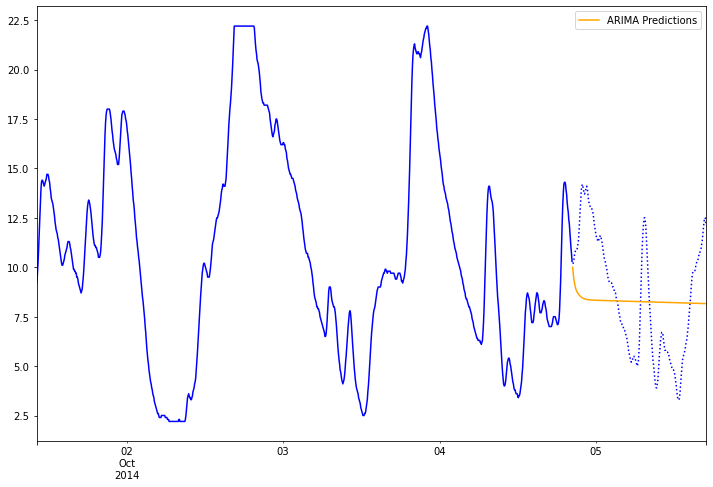

In [82]:
#Plot the ARIMA predictions vs the actual values
CGM_train['glucose'].plot(figsize=[12,8],color='blue',ls='-') #,legend=True)
CGM_test['glucose'].plot(color='blue',ls=':') #,legend=True)
arima_predictions.plot(color='orange',legend=True);
#arima_historical_estimates.plot(color='red',ls='-',lw=0.5,legend=True);

In [83]:
from statsmodels.tools.eval_measures import mse, rmse, meanabs

# Alternative:
# from sklearn.metrics import mean_squared_error

arima_error = rmse(CGM_test['glucose'],arima_predictions)
print(f'ARIMA RMSE Error without Exogenous variables: {arima_error}')


ARIMA RMSE Error without Exogenous variables: 3.0049411268874695


#### Let's now try introducing in the model some other exogenous variables that may help improve the fit, such as the time from the last fast insulin dosage taken (and possibly its amount) 

In [84]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarimax_model = SARIMAX(CGM_train['glucose'],exog=CGM_train[['min_from_last_dose','last_insulin_dose']],order=arima_stepwise_fit.order) #,seasonal_order=arima_stepwise_fit.seasonal_order)


In [85]:
sarimax_results = sarimax_model.fit()
sarimax_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                glucose   No. Observations:                  987
Model:               SARIMAX(7, 1, 0)   Log Likelihood                 977.833
Date:                Thu, 29 Jul 2021   AIC                          -1935.667
Time:                        10:20:58   BIC                          -1886.730
Sample:                    10-01-2014   HQIC                         -1917.055
                         - 10-04-2014                                         
Covariance Type:                  opg                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
min_from_last_dose -2.275e-05   3.85e-05     -0.591      0.555   -9.82e-05    5.27e-05
last_insulin_dose      0.0029      0.004      0.758      0.449      -0.005       0.011
ar.L1                  0.8004      0.033     24.139      0.000       0.735       0.865
ar.L2                  0.4597      0.039     11.706      0.000       0.383       0.537
ar.L3                 -0.0253      0.038     -0.670      0.503      -0.099       0.049
ar.L4                 -0.2925      0.042     -6.893      0.000      -0.376      -0.209
ar.L5                 -0.2017      0.044     -4.584      0.000      -0.288      -0.115
ar.L6                  0.0650      0.041      1.595      0.111      -0.015       0.145
ar.L7                  0.1013      0.031      3.252      0.001       0.040       0.162
sigma2                 0.0080      0.000     28.281      0.000       0.007       0.009
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               139.00
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               1.24   Skew:                            -0.12
Prob(H) (two-sided):                  0.06   Kurtosis:                         4.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [86]:
# Obtain predicted values with the Exogenous term
start=len(CGM_train)
end=len(CGM_train)+len(CGM_test)-1
exog_forecast = CGM_test[['min_from_last_dose','last_insulin_dose']]  # requires two brackets 
sarimax_predictions = sarimax_results.predict(start=start, end=end, exog=exog_forecast, dynamic=False, typ='levels').rename('ARIMA Predictions with Time from last dose and dosage (Exogenous)')

In [87]:
# Print values from SARIMA above
sarimax_error = rmse(CGM_test['glucose'],sarimax_predictions)
print(f'ARIMA RMSE Error using Time from last dose and last dosage as Exogenous variables: {sarimax_error}')


ARIMA RMSE Error using Time from last dose and last dosage as Exogenous variables: 3.0257751692483477


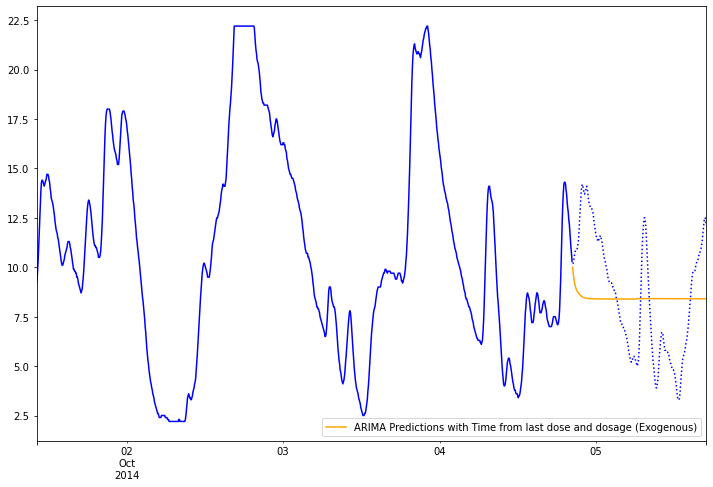

In [88]:
#Plot the SARIMAX predictions vs the actual values
CGM_train['glucose'].plot(figsize=[12,8],color='blue',ls='-') #,legend=True)
CGM_test['glucose'].plot(color='blue',ls=':') #,legend=True)
sarimax_predictions.plot(color='orange',legend=True);

Those variables did not really add anything to the estimate/prediction... let's try with the more sophisticate 'insulin effect'
variable as an exogenous input

In [89]:
sarimax_model_new = SARIMAX(CGM_train['glucose'],exog=CGM_train['insulin_effect'],order=arima_stepwise_fit.order) #,time_varying_regression=True,mle_regression=False,seasonal_order=arima_stepwise_fit.seasonal_order)
sarimax_results_new = sarimax_model_new.fit()
sarimax_results_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                glucose   No. Observations:                  987
Model:               SARIMAX(7, 1, 0)   Log Likelihood                 978.223
Date:                Thu, 29 Jul 2021   AIC                          -1938.447
Time:                        10:21:00   BIC                          -1894.404
Sample:                    10-01-2014   HQIC                         -1921.696
                         - 10-04-2014                                         
Covariance Type:                  opg                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
insulin_effect     0.0030      0.019      0.158      0.874      -0.034       0.040
ar.L1              0.8068      0.033     24.293      0.000       0.742       0.872
ar.L2              0.4621      0.039     11.720      0.000       0.385       0.539
ar.L3             -0.0341      0.038     -0.896      0.370      -0.109       0.040
ar.L4             -0.2928      0.043     -6.853      0.000      -0.377      -0.209
ar.L5             -0.1997      0.044     -4.507      0.000      -0.287      -0.113
ar.L6              0.0685      0.041      1.663      0.096      -0.012       0.149
ar.L7              0.0977      0.031      3.118      0.002       0.036       0.159
sigma2             0.0080      0.000     28.170      0.000       0.007       0.009
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               139.23
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.23   Skew:                            -0.12
Prob(H) (two-sided):                  0.06   Kurtosis:                         4.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [90]:
exog_forecast_new = CGM_test[['insulin_effect']]  # requires two brackets 
sarimax_predictions_new = sarimax_results_new.predict(start=start, end=end, exog=exog_forecast_new, dynamic=False, typ='levels').rename('ARIMA Predictions with modeled Insulin Effect (Exogenous)')

In [91]:
sarimax_error_new = rmse(CGM_test['glucose'],sarimax_predictions_new)
print(f'ARIMA RMSE Error using predicted Insulin effect as Exogenous variables: {sarimax_error_new}')


ARIMA RMSE Error using predicted Insulin effect as Exogenous variables: 3.0271466273396928


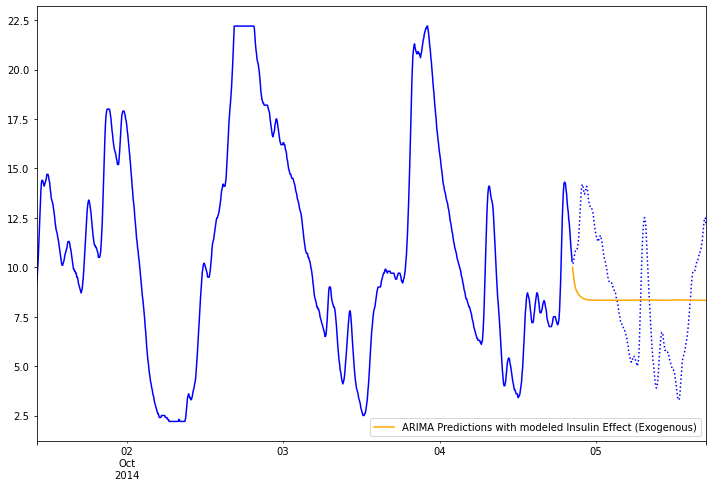

In [92]:
#Plot the SARIMAX predictions vs the actual values
CGM_train['glucose'].plot(figsize=[12,8],color='blue',ls='-') #,legend=True)
CGM_test['glucose'].plot(color='blue',ls=':') #,legend=True)
sarimax_predictions_new.plot(color='orange',legend=True);